<a href="https://colab.research.google.com/github/RimantasJ/Bakalaurinis/blob/main/Bakalaurinis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trilateration

In [ ]:
import math
  
class Sensor:
  def __init__ (self, x, y, z):
    self.x = x
    self.y = y
    self.z = z

  def foo(self):
    print(self.z)

class Sensor3D:
  def __init__ (self, x=None, y=None, z=None, r=None):
    self.x = x
    self.y = y
    self.z = z
    self.r = r

  def foo(self):
    print(self.r)

def sq(val):
  return val**2

In [ ]:
def TrilaterationWithDistance (s):
  va = (s[1].z ** 2 - s[2].z ** 2)
  va = va - (s[1].x ** 2 - s[2].x ** 2)
  va = va - (s[1].y ** 2 - s[2].y ** 2)
  va = va / 2

  vb = (s[1].z ** 2 - s[0].z ** 2)
  vb = vb - (s[1].x ** 2 - s[0].x ** 2)
  vb = vb - (s[1].y ** 2 - s[0].y ** 2)
  vb = vb / 2

  y = vb * (s[2].x - s[1].x) - va * (s[0].x - s[1].x)
  y = y / ((s[0].y - s[1].y) * (s[2].x - s[1].x) - (s[2].y - s[1].y) * (s[0].x - s[1].x))

  x = va - y * (s[2].y - s[1].y)
  x = x / (s[2].x - s[1].x)

  return (x, y)

In [ ]:
sensors = [0, 0, 0]
sensors[0] = Sensor(0, 0, math.sqrt(13)/2)
sensors[1] = Sensor(2, 4, 1/2)
sensors[2] = Sensor(4, 4, math.sqrt(5)/2)
TrilaterationWithDistance(sensors)

In [ ]:
def TrilaterationWithLinearSignal (sensors):
  x1, y1, z1 = sensors[0].x, sensors[0].y, sensors[0].z
  x2, y2, z2 = sensors[1].x, sensors[1].y, sensors[1].z
  x3, y3, z3 = sensors[2].x, sensors[2].y, sensors[2].z
  x4, y4, z4 = sensors[3].x, sensors[3].y, sensors[3].z

  z21 = z2 ** 2 - z1 ** 2
  print("z21: ", z21)
  z31 = z3 ** 2 - z1 ** 2
  print("z31: ", z31)
  z41 = z4 ** 2 - z1 ** 2
  print("z41: ", z41)

  x_upper1 = (sq(x3)*z21 - sq(x2)*z31 + sq(y3)*z21 - sq(y2)*z31) * (y2*z41 - y4*z21)
  print("xu1: ", x_upper1)
  x_upper2 = (sq(x4)*z21 - sq(x2)*z41 + sq(y4)*z21 - sq(y2)*z41) * (y2*z31 - y3*z21)
  print("xu2: ", x_upper2)
  x_upper =  x_upper1 - x_upper2
  print("xu : ", x_upper)

  x_lower1 = 2 * (x2*z41 - x4*z21) * (y2*z31 - y3*z21)
  print("xl1: ", x_lower1)
  x_lower2 = 2 * (x2*z31 - x3*z21) * (y2*z41 - y4*z21)
  print("xl2: ", x_lower2)
  x_lower =  x_lower1 - x_lower2
  print("xl:  ", x_lower)

  x = x_upper / x_lower
  print("x:   ", x)

  y_upper1 = sq(x2)*z31
  print("yu1: ", y_upper1)
  y_upper2 = sq(x3)*z21
  print("yu2: ", y_upper2)
  y_upper3 = 2*x*(x2*z31- x3*z21)
  print("yu3: ", y_upper3)
  y_upper4 = sq(y2)*z31
  print("yu4: ", y_upper4)
  y_upper5 = sq(y3)*z21
  print("yu5: ", y_upper5)

  y_upper =  y_upper1 - y_upper2 - y_upper3  + y_upper4 - y_upper5
  print("yu:  ", y_upper)
  y_lower = 2*(y2*z31 - y3*z21)
  print("yl:  ", y_lower)
  y = y_upper / y_lower
  print("y:   ", y)

  z = (sq(x2) - 2*x2*x + sq(y2) - 2*y2*y) / z21

  return (round(x), round(y), round(z))

In [ ]:
# D1
sensors = [0, 0, 0, 0]
sensors[0] = Sensor(0,0,math.sqrt(2)*2)
sensors[1] = Sensor(2,4,2)
sensors[2] = Sensor(6,2,4)
sensors[3] = Sensor(6,5,5)

TrilaterationWithLinearSignal(sensors)

In [ ]:
# D2
sensors = [0, 0, 0, 0]
sensors[0] = Sensor(0,0,(math.sqrt(2)*2/3))
sensors[1] = Sensor(1,3,(math.sqrt(2)/3))
sensors[2] = Sensor(4,1,(math.sqrt(5)/3))
sensors[3] = Sensor(5,4,(math.sqrt(13)/3))

TrilaterationWithLinearSignal(sensors)

In [ ]:
# D3
sensors = [0, 0, 0, 0]
sensors[0] = Sensor(0,0,(math.sqrt(10)/3))
sensors[1] = Sensor(2,3,(math.sqrt(5)/3))
sensors[2] = Sensor(4,5,(math.sqrt(17)/3))
sensors[3] = Sensor(6,4,(math.sqrt(2)*3/3))

TrilaterationWithLinearSignal(sensors)

In [ ]:
def TrilaterationWithInverseLinearSignal (sensors):
  x1, y1, z1 = sensors[0].x, sensors[0].y, 1/sensors[0].z
  x2, y2, z2 = sensors[1].x, sensors[1].y, 1/sensors[1].z
  x3, y3, z3 = sensors[2].x, sensors[2].y, 1/sensors[2].z
  x4, y4, z4 = sensors[3].x, sensors[3].y, 1/sensors[3].z

  z21 = sq(z2) - sq(z1)
  z31 = sq(z3) - sq(z1) 
  z41 = sq(z4) - sq(z1) 

  x_upper1 = (sq(x3)*z21 - sq(x2)*z31 + sq(y3)*z21 - sq(y2)*z31) * (y2*z41 - y4*z21)
  x_upper2 = (sq(x4)*z21 - sq(x2)*z41 + sq(y4)*z21 - sq(y2)*z41) * (y2*z31 - y3*z21)
  x_upper =  x_upper1 - x_upper2
  x_lower1 = 2 * (x2*z41 - x4*z21) * (y2*z31 - y3*z21)
  x_lower2 = 2 * (x2*z31 - x3*z21) * (y2*z41 - y4*z21)
  x_lower =  x_lower1 - x_lower2
  x = x_upper / x_lower

  y_upper1 = sq(x2)*z31
  y_upper2 = sq(x3)*z21
  y_upper3 = 2*x*(x2*z31- x3*z21)
  y_upper4 = sq(y2)*z31
  y_upper5 = sq(y3)*z21

  y_upper =  y_upper1 - y_upper2 - y_upper3  + y_upper4 - y_upper5
  y_lower = 2*(y2*z31 - y3*z21)
  y = y_upper / y_lower

  z = math.sqrt((sq(x2) - 2*x2*x + sq(y2) - 2*y2*y) / z21)

  return (round(x), round(y), round(z))

In [ ]:
# D1
sensors = [0, 0, 0, 0]
sensors[0] = Sensor(0, 0, 1 / (math.sqrt(2)*2/3))
sensors[1] = Sensor(2, 4, 1 / (2/3))
sensors[2] = Sensor(6, 2, 1 / (4/3))
sensors[3] = Sensor(6, 5, 1 / (5/3))

TrilaterationWithInverseLinearSignal(sensors)

In [ ]:
def TrilaterationWithInverseSquareSignal (sensors):
  x1, y1, z1 = sensors[0].x, sensors[0].y, sensors[0].z
  x2, y2, z2 = sensors[1].x, sensors[1].y, sensors[1].z
  x3, y3, z3 = sensors[2].x, sensors[2].y, sensors[2].z
  x4, y4, z4 = sensors[3].x, sensors[3].y, sensors[3].z

  z21 = sq(z2) - sq(z1)
  z31 = sq(z3) - sq(z1) 
  z41 = sq(z4) - sq(z1) 

  x_upper1 = (sq(x3)*z21 - sq(x2)*z31 + sq(y3)*z21 - sq(y2)*z31) * (y2*z41 - y4*z21)
  x_upper2 = (sq(x4)*z21 - sq(x2)*z41 + sq(y4)*z21 - sq(y2)*z41) * (y2*z31 - y3*z21)
  x_upper =  x_upper1 - x_upper2
  x_lower1 = 2 * (x2*z41 - x4*z21) * (y2*z31 - y3*z21)
  x_lower2 = 2 * (x2*z31 - x3*z21) * (y2*z41 - y4*z21)
  x_lower =  x_lower1 - x_lower2
  x = x_upper / x_lower

  y_upper1 = sq(x2)*z31
  y_upper2 = sq(x3)*z21
  y_upper3 = 2*x*(x2*z31- x3*z21)
  y_upper4 = sq(y2)*z31
  y_upper5 = sq(y3)*z21
  y_upper =  y_upper1 - y_upper2 - y_upper3  + y_upper4 - y_upper5
  y_lower = 2*(y2*z31 - y3*z21)
  y = y_upper / y_lower

  z = math.sqrt((sq(x2) - 2*x2*x + sq(y2) - 2*y2*y) / z21)

  return (round(x), round(y), round(z))

In [ ]:
# D5
sensors = [0, 0, 0, 0]
sensors[0] = Sensor3D(0, 0, 9 / 17)
sensors[1] = Sensor3D(1, 4, 1 / 2)
sensors[2] = Sensor3D(4, 9, 9 / 64)
sensors[3] = Sensor3D(8, 4, 9 / 25)

TrilaterationWithInverseSquareSignal(sensors)

In [ ]:
def TrilaterationWithDistance3D (sensors):
  x1, y1, z1, r1 = sensors[0].x, sensors[0].y, sensors[0].z, sensors[0].r
  x2, y2, z2, r2 = sensors[1].x, sensors[1].y, sensors[1].z, sensors[1].r
  x3, y3, z3, r3 = sensors[2].x, sensors[2].y, sensors[2].z, sensors[2].r
  x4, y4, z4, r4 = sensors[3].x, sensors[3].y, sensors[3].z, sensors[3].r
  x5, y5, z5, r5 = sensors[4].x, sensors[4].y, sensors[4].z, sensors[4].r

  r21 = sq(r2) - sq(r1)
  r31 = sq(r3) - sq(r1)
  r41 = sq(r4) - sq(r1)
  r51 = sq(r5) - sq(r1)

  x23 = x2*r31-x3*r21
  x24 = x2*r41-x4*r21
  x25 = x2*r51-x5*r21

  y23 = y2*r31-y3*r21
  y24 = y2*r41-y4*r21
  y25 = y2*r51-y5*r21

  z23 = z2*r31-z3*r21
  z24 = z2*r41-z4*r21
  z25 = z2*r51-z5*r21

  xyz2 = sq(x2) + sq(y2) + sq(z2)
  xyz3 = sq(x3) + sq(y3) + sq(z3)
  xyz4 = sq(x4) + sq(y4) + sq(z4)
  xyz5 = sq(x5) + sq(y5) + sq(z5)

  xu1 = z23*(xyz4*r21 - xyz2*r41) - z24*(xyz3*r21 - xyz2*r31)
  xu2 = y25*z23 - y23*z25
  xu3 = z23*(xyz5*r21 - xyz2*r51) - z25*(xyz3*r21 - xyz2*r31)
  xu4 = y24*z23 - y23*z24
  xu = xu1 * xu2 - xu3 * xu4
  xl1 = (x25 * z23 - x23 * z25) * (y24 * z23 - y23 * z24)
  xl2 = (x24 * z23 - x23 * z24) * (y25 * z23 - y23 * z25)
  xl = 2 * (xl1 - xl2)
  x = xu / xl

  yu1 = -z23 * (xyz4 * r21 - xyz2 * r41)
  yu2 = z24 * (xyz3 * r21 - xyz2 * r31)
  yu3 = -2 * x * (x24 * z23 - x23 * z24)
  yu = yu1 + yu2 + yu3
  yl = 2 * (y24 * z23 - y23 * z24)
  y = yu / yl

  z = (-xyz3 * r21 + xyz2 * r31 - 2 * x * x23 - 2 * y * y23) / (2 * z23)

  return [round(x), round(y), round(z)]

In [ ]:
sensors = [0, 0, 0, 0, 0]

sensors[0] = Sensor3D(0, 0, 1, math.sqrt(10))
sensors[1] = Sensor3D(2, 3, 1, math.sqrt(5))
sensors[2] = Sensor3D(4, 5, 1, math.sqrt(17))
sensors[3] = Sensor3D(6, 4, 1, math.sqrt(18))
sensors[4] = Sensor3D(5, 1, 1, 2)

TrilaterationWithDistance3D(sensors)

In [ ]:
# D6
sensors = [0, 0, 0, 0, 0]
sensors[0] = Sensor3D(0, 0, 1, math.sqrt(17))
sensors[1] = Sensor3D(1, 4, 1, math.sqrt(18))
sensors[2] = Sensor3D(4, 9, 1, 8)
sensors[3] = Sensor3D(8, 4, 1, 5)
sensors[4] = Sensor3D(6, 1, 1, 2)

TrilaterationWithDistance3D(sensors)

In [ ]:
# assuming that radiation is passed, that decreases as 1 / sqrt(r)

def TrilaterationWithDistance3D (ds):
  x1, y1, z1, r1 = ds[0].x,      ds[0].y,      ds[0].z,      1/ds[0].r
  x2, y2, z2, r2 = ds[1].x - x1, ds[1].y - y1, ds[1].z - z1, 1/ds[1].r
  x3, y3, z3, r3 = ds[2].x - x1, ds[2].y - y1, ds[2].z - z1, 1/ds[2].r
  x4, y4, z4, r4 = ds[3].x - x1, ds[3].y - y1, ds[3].z - z1, 1/ds[3].r
  x5, y5, z5, r5 = ds[4].x - x1, ds[4].y - y1, ds[4].z - z1, 1/ds[4].r

  r21 = r2 - r1
  r31 = r3 - r1
  r41 = r4 - r1
  r51 = r5 - r1

  x23 = x2*r31-x3*r21
  x24 = x2*r41-x4*r21
  x25 = x2*r51-x5*r21
  y23 = y2*r31-y3*r21
  y24 = y2*r41-y4*r21
  y25 = y2*r51-y5*r21
  z23 = z2*r31-z3*r21
  z24 = z2*r41-z4*r21
  z25 = z2*r51-z5*r21

  t2 = sq(x2) + sq(y2) + sq(z2)
  t3 = sq(x3) + sq(y3) + sq(z3)
  t4 = sq(x4) + sq(y4) + sq(z4)
  t5 = sq(x5) + sq(y5) + sq(z5)

  xu1 = z23*(t4*r21 - t2*r41) - z24*(t3*r21 - t2*r31)
  xu2 = y25*z23 - y23*z25
  xu3 = z23*(t5*r21 - t2*r51) - z25*(t3*r21 - t2*r31)
  xu4 = y24*z23 - y23*z24
  xu = xu1 * xu2 - xu3 * xu4
  xl1 = (x25 * z23 - x23 * z25) * (y24 * z23 - y23 * z24)
  xl2 = (x24 * z23 - x23 * z24) * (y25 * z23 - y23 * z25)
  xl = 2 * (xl1 - xl2)
  x = xu / xl

  yu1 = z24 * (t3 * r21 - t2 * r31)
  yu2 = z23 * (t4 * r21 - t2 * r41)
  yu3 = 2 * x * (x24 * z23 - x23 * z24)
  yu = yu1 - yu2 - yu3
  yl = 2 * (y24 * z23 - y23 * z24)
  y = yu / yl

  z = (t2 * r31 - t3 * r21 - 2 * x * x23 - 2 * y * y23) / (2 * z23)

  return [(x+x1), (y+y1), (z+z1)]

In [ ]:
# z = 6

ds = []
ds.append(Dosimeter3D(1, 5, 2, 1/24))
ds.append(Dosimeter3D(5, 4, 5, 1/6))
ds.append(Dosimeter3D(2, 1, 8, 1/9))

TrilaterationSimplified(ds, 3, 3)

6.0

In [ ]:
#  z = 6
ds = []
ds.append(Dosimeter3D(1, 5, 2, 1/24))
ds.append(Dosimeter3D(1, 5, 8, 1/12))
ds.append(Dosimeter3D(5, 4, 5, 1/6))
ds.append(Dosimeter3D(5, 4, 8, 1/9))
ds.append(Dosimeter3D(2, 1, 8, 1/9))

RadiationToDistanceLinear(ds)

TrilaterationWithDistance3D(ds)

[2.9172413793103447, 3.0827586206896553, 6.241379310344827]

# SymPy

In [ ]:
#Sympy testing

from sympy import symbols, nonlinsolve, Dummy
x, y = symbols('x, y', real=True)
x1 = Dummy('x1')
x2 = Dummy('x2')
x3 = Dummy('x3')
y1 = Dummy('y1')
y2 = Dummy('y2')
y3 = Dummy('y3')

nonlinsolve([(x1-x)**2+(y1-y)**2, (x2-x)**2+(y2-y)**2, (x3-x)**2+(y3-y)**2], [x, y])


FiniteSet((_x1 - I*(-_y1 - I*(_x1 - _x2 + _y1*I + _y2*I)/2), -I*(_x1 - _x2 + _y1*I + _y2*I)/2), (_x1 + I*(-_y1 + I*(_x1 - _x2 - _y1*I - _y2*I)/2), I*(_x1 - _x2 - _y1*I - _y2*I)/2))

# Dosimeter generation

In [ ]:
# Dosimeter generation

# def GenerateDosimeters(ds_count, sx, sy, sz, min, max):
#   ds = []
  
#   for i in range(ds_count):
#     d = Dosimeter3D()
#     d.x = random.uniform(min, max)
#     d.y = random.uniform(min, max)
#     if (sz == 0):
#       d.z = 0
#     else:
#       d.z = random.uniform(min, max)

#     d.r = 1 / ((d.x - sx) ** 2 + (d.y - sy) ** 2 + (d.z - sz) ** 2)

#     ds.append(d)

#   return ds

def LineRadiation(d, xs, ys, zs):
  radiation = 0

  for i in range(len(xs)):
    radiation += 1 / ((d.x - xs[i]) ** 2 + (d.y - ys[i]) ** 2 + (d.z - zs[i]) ** 2)

  return radiation/2 # nes nusistatau šiuo atveju k = 1/2

def GenerateDosimetersLine(ds_count, src_x, src_y, src_z, min, max, src_len):
  src_xs, src_ys, src_zs = [], [], []
  ds = []
  offset = src_len / (2 * math.sqrt(3))
  step = 0.2
  axis_step = step / math.sqrt(3)

  i = 0
  while step * i < src_len:
    src_xs.append(src_x - offset + axis_step * i)
    src_ys.append(src_y - offset + axis_step * i)
    src_zs.append(src_z - offset + axis_step * i)
    i += 1
  
  for i in range(ds_count):
    d = Dosimeter3D()
    d.x = random.uniform(min, max)
    d.y = random.uniform(min, max)
    if (src_z == 0):
      d.z = 0
    else:
      d.z = random.uniform(min, max)
    d.r = LineRadiation(d, src_xs, src_ys, src_zs)

    ds.append(d)

  return ds

def AddNoise(ds, val=0.1):
  for d in ds:
    noise = np.random.normal(0, val, 1)
    while (d.r + noise[0] < 0):
      noise = np.random.normal(0, val, 1)
    d.r += noise[0]
  
  return ds

# PDF

## Univariate

0.24129692688666668
<class 'numpy.ndarray'>


1.6026026026026026

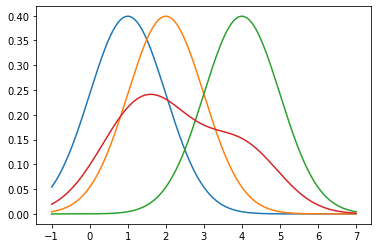

In [ ]:
# pdf example
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

sc = 1
x_axis = np.linspace(-1, 7, 1000)

y1 = norm.pdf(x_axis, 1, sc)
y2 = norm.pdf(x_axis, 2, sc)
y3 = norm.pdf(x_axis, 4, sc)
y = (1/3) * y1 + (1/3) * y2 + (1/3) * y3

plt.plot(x_axis, y1)
plt.plot(x_axis, y2)
plt.plot(x_axis, y3)
plt.plot(x_axis, y)

print(max(y))
print(type(y))
x_axis[np.argmax(y)]

In [ ]:
def MixtureDensityMaximum1D(xs):
  x_axis = np.linspace(-1, 7, 1000)
  scale = 1
  pdfs = []
  mdf = 0

  for x in xs:
    pdf = norm.pdf(x_axis, x, scale)
    pdfs.append(pdf)

    mdf += (pdf / len(xs))

  return x_axis[np.argmax(mdf)]

def MixtureDensity1DWithGraphs(xs):
  scale = 1
  x_axis = np.linspace(-1, 7, 1000)

  pdfs = []
  mdf = 0
  for x in xs:
    pdf = norm.pdf(x_axis, x, scale)
    plt.plot(x_axis, pdf)
    pdfs.append(pdf)

    mdf += (pdf / len(xs))

  plt.plot(x_axis, mdf)

  return x_axis[np.argmax(mdf)]

def MixtureDensity2D(points):
  xs = []
  ys = []
  for p in points:
    xs.append(p[0])
    ys.append(p[1])

  x = MixtureDensityMaximum1D(xs)
  y = MixtureDensityMaximum1D(ys)

  return (x, y)

def MixtureDensity3D(points):
  xs = []
  ys = []
  zs = []
  for p in points:
    xs.append(p[0])
    ys.append(p[1])
    zs.append(p[2])

  x = MixtureDensityMaximum1D(xs)
  y = MixtureDensityMaximum1D(ys)
  z = MixtureDensityMaximum1D(zs)

  return (x, y, z)

In [ ]:
xs = [1,2,4]
MixtureDensity1DWithGraphs(xs)

In [ ]:
points = [(1, 2, 2), (2, 3, 3), (6, 3, 2), (1,5,6), (1,5,9), (12,3,56), (1,5,9), (4,9,12), (12,5,9), (2,6,8)]
point_new = []
for i in range(len(points)):
  noise = np.random.normal(0, 0.2, 3) #-0.5
  tmp_point = points[i] + noise
  point_new.append(tmp_point)
  # ptrin(point_new)
  # triplet[0] += noise[0]
  # triplet[1] += noise[1]
  # triplet[2] += noise[2]

print(point_new)

rez = MixtureDensity3D(point_new)
print(rez)
rez2 = MixtureDensity3D(points)
print(rez2)

[array([0.57855409, 2.09576735, 2.17179891]), array([2.17144456, 2.79893407, 2.93090137]), array([6.14562948, 3.00098136, 2.31544155]), array([0.99190689, 4.87084059, 5.92357799]), array([1.04255046, 4.65695029, 8.51955957]), array([11.99766933,  2.92002697, 56.0758825 ]), array([0.96335004, 5.10076435, 8.62469267]), array([ 4.0977001 ,  9.20941023, 12.06123721]), array([12.35184209,  4.95248949,  9.23791763]), array([1.98979364, 5.85449459, 8.21407222])]
(1.234234234234234, 4.781781781781782, 2.4674674674674675)
(1.3063063063063063, 4.90990990990991, 2.2912912912912913)


## Multivariate

In [ ]:
# Multivariate distribution
import numpy as np

import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

ds = [0, 0, 0, 0, 0]
ds[0] = Sensor3D(1,1,1, 0.25)
ds[1] = Sensor3D(0,4,3, 0.04545)
ds[2] = Sensor3D(0,4,4, 0.03704)
ds[3] = Sensor3D(0,2,1, 0.1)
ds[4] = Sensor3D(4,0,3, 0.16667)

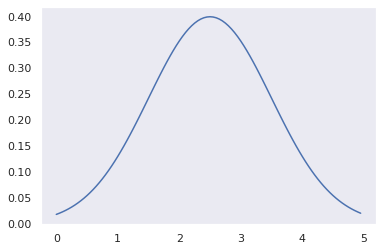

In [ ]:
# plt 1D

x = np.linspace(0, 5, 100, endpoint=False)
y = multivariate_normal.pdf(x, mean=2.5, cov=1)
fig1 = plt.figure()
ax = fig1.add_subplot(111)
ax.plot(x, y)

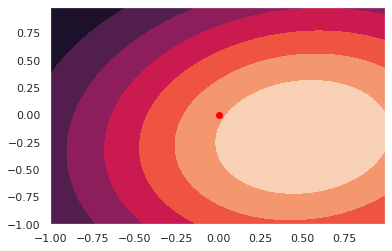

In [ ]:
# plt 2D

x, y = np.mgrid[-1:1:.01, -1:1:.01]
pos = np.dstack((x, y))
rv = multivariate_normal([0.5, -0.2], [[1.0, -1], [0.1, 1]])
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.contourf(x, y, rv.pdf(pos))
ax2.scatter(0, 0, c="red")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


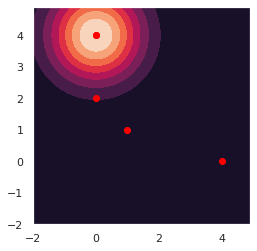

In [ ]:
# plt contour

x, y = np.mgrid[-2:5:.1, -2:5:.1]
pos = np.dstack((x, y))
rv1 = multivariate_normal([ds[0].x,ds[0].y], 1) # [[0.5, 0.5], [0.6, 0.5]]
rv2 = multivariate_normal([ds[1].x,ds[1].y], 1) # [[0.5, 0.5], [0.6, 0.5]]

fig2 = plt.figure()
fig2.gca().set_aspect('equal', adjustable='box')
ax2 = fig2.add_subplot(111)
ax3 = fig2.add_subplot(111)

ax2.contourf(x, y, rv1.pdf(pos))
ax3.contourf(x, y, rv2.pdf(pos))
for d in ds:
  ax2.scatter(d.x, d.y, c="red")
  
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


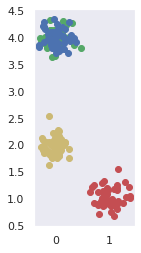

In [ ]:
# plt scatter

x, y = np.mgrid[-2:5:.1, -2:5:.1]
pos = np.dstack((x, y))

fig = plt.figure()
fig.gca().set_aspect('equal', adjustable='box')
ax = fig.add_subplot(111)

t_cov = [[0.025, 0.0], [0.0, 0.025]]

xy = []
for d in ds:
  t_x, t_y = np.random.multivariate_normal([d.x, d.y], t_cov, 50).T
  xy.append([t_x, t_y])

ax.scatter(xy[0][0],xy[0][1],c='r')
ax.scatter(xy[1][0],xy[1][1],c='g')
ax.scatter(xy[2][0],xy[2][1],c='b')
ax.scatter(xy[3][0],xy[3][1],c='y')
plt.show() 

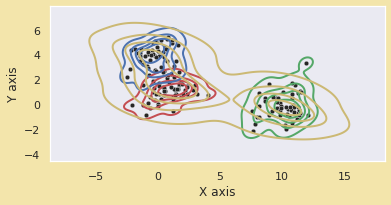

In [ ]:
# Seaborn 2D

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="dark")

# Simulate data from a bivariate Gaussian
x1, y1 = np.random.multivariate_normal([ds[0].x, ds[0].y], [[2.0, 0.3], [0.3, 0.5]], 50).T

x2, y2 = np.random.multivariate_normal([ds[1].x, ds[1].y], [[1, 0.3], [0.3, 1]], 50).T

x3, y3 = np.random.multivariate_normal([10, 0], [[1, 0.1], [0.1, 1]], 50).T

x = np.concatenate([x1, x2, x3])
y = np.concatenate([y1, y2, y3])

# Draw a combo histogram and scatterplot with density contours
f, ax = plt.subplots(figsize=(6, 6), facecolor='#F3E5AB', edgecolor='#FF7F50')
# fig.add_axes([1,1,5,1], projection=None, polar=False)
f.gca().set_aspect('equal', adjustable='box')
# ax = fig.add_subplot(111)
plt.xlabel("X axis")
plt.ylabel("Y axis")

sns.scatterplot(x=x1, y=y1, s=20, color=".15")
sns.histplot(x=x1, y=y1, bins=1000, pthresh=.1, cmap="mako")
sns.kdeplot(x=x1, y=y1, levels=5, color="r", linewidths=2)

sns.scatterplot(x=x2, y=y2, s=20, color=".15")
sns.histplot(x=x2, y=y2, bins=1000, pthresh=.1, cmap="mako")
sns.kdeplot(x=x2, y=y2, levels=5, color="b", linewidths=2)

sns.scatterplot(x=x3, y=y3, s=20, color=".15")
sns.histplot(x=x3, y=y3, bins=1000, pthresh=.1, cmap="mako")
sns.kdeplot(x=x3, y=y3, levels=5, color="g", linewidths=2)

sns.scatterplot(x=x, y=y, s=20, color=".15")
sns.histplot(x=x, y=y, bins=1000, pthresh=.1, cmap="mako")
sns.kdeplot(x=x, y=y, levels=5, color="y", linewidths=2)

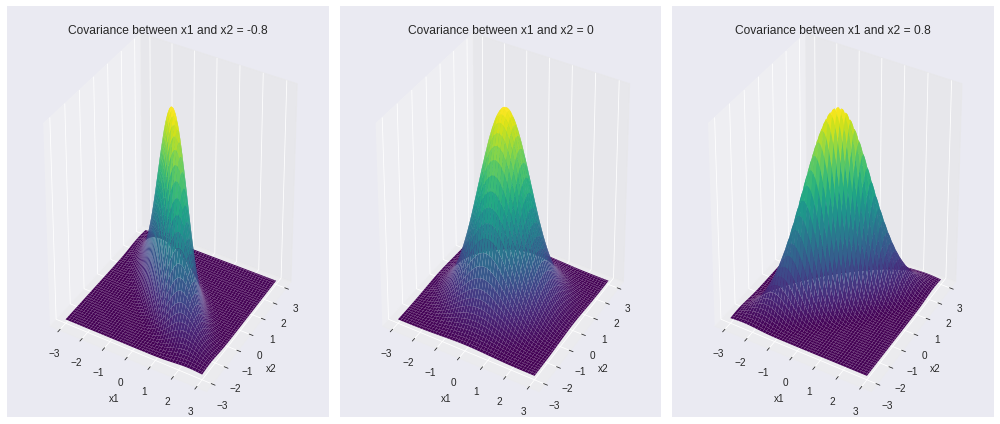

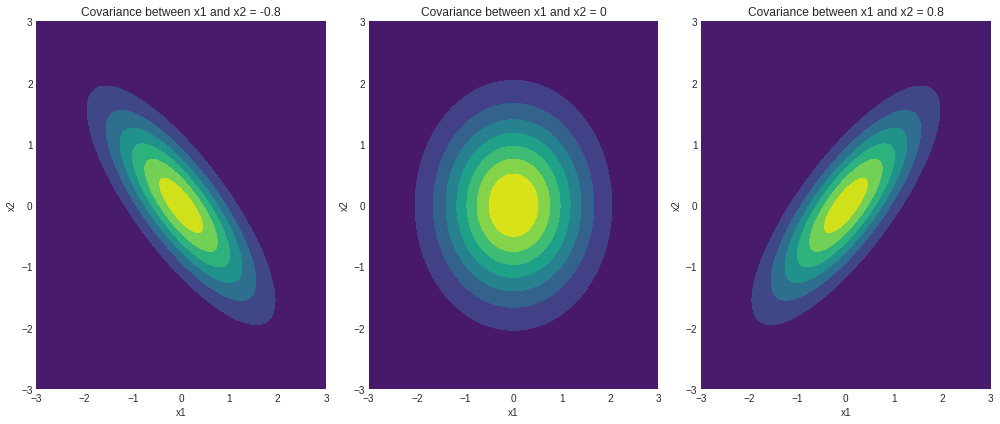

In [ ]:
# Importing the necessary modules
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize']=14,6
fig = plt.figure()

# Initializing the random seed
random_seed=1000

# List containing the variance
# covariance values
cov_val = [-0.8, 0, 0.8]

# Setting mean of the distributino
# to be at (0,0)
mean = np.array([0,0])

# Storing density function values for
# further analysis
pdf_list = []

# Iterating over different covariance values
for idx, val in enumerate(cov_val):
	
	# Initializing the covariance matrix
	cov = np.array([[1, val], [val, 1]])
	
	# Generating a Gaussian bivariate distribution
	# with given mean and covariance matrix
	distr = multivariate_normal(cov = cov, mean = mean,
								seed = random_seed)
	
	# Generating a meshgrid complacent with
	# the 3-sigma boundary
	mean_1, mean_2 = mean[0], mean[1]
	sigma_1, sigma_2 = cov[0,0], cov[1,1]
	
	x = np.linspace(-3*sigma_1, 3*sigma_1, num=100)
	y = np.linspace(-3*sigma_2, 3*sigma_2, num=100)
	X, Y = np.meshgrid(x,y)
	
	# Generating the density function
	# for each point in the meshgrid
	pdf = np.zeros(X.shape)
	for i in range(X.shape[0]):
		for j in range(X.shape[1]):
			pdf[i,j] = distr.pdf([X[i,j], Y[i,j]])
	
	# Plotting the density function values
	key = 131+idx
	ax = fig.add_subplot(key, projection = '3d')
	ax.plot_surface(X, Y, pdf, cmap = 'viridis')
	plt.xlabel("x1")
	plt.ylabel("x2")
	plt.title(f'Covariance between x1 and x2 = {val}')
	pdf_list.append(pdf)
	ax.axes.zaxis.set_ticks([])

plt.tight_layout()
plt.show()

# Plotting contour plots
for idx, val in enumerate(pdf_list):
	plt.subplot(1,3,idx+1)
	plt.contourf(X, Y, val, cmap='viridis')
	plt.xlabel("x1")
	plt.ylabel("x2")
	plt.title(f'Covariance between x1 and x2 = {cov_val[idx]}')
plt.tight_layout()
plt.show()


# Example calculations

In [ ]:
# Using generated dosimeters

ds_count = 9
ds_min = 5
src_len = 15

ds = GenerateDosimetersLine(ds_count=ds_count, src_x=25, src_y=25, src_z=25, min=0, max=50, src_len=src_len)
# print("Clean")
# for d in ds:
#   print(d.x, " ", d.y, " ", d.z, " ", d.r)

AddNoise(ds, 0.0008)
# print("Noisy")
# for d in ds:
#   print(d.x, " ", d.y, " ", d.z, " ", d.r)
for d in ds:
  d.print()

13.24934169691066   13.608151586055245   9.978269791282191   0.08763289406350074
27.984107120095477   6.283915651632205   44.975887667772426   0.04906549909433018
9.13355825257532   5.566497063338538   0.7287054739603394   0.032152675536534926
2.3907536184332887   43.30204841974464   46.396767441227574   0.027634767944915106
43.42024583715428   14.553364203941738   22.869882618498615   0.07841753964551873
39.157816805657056   8.66842109478561   9.0586226345446   0.05227321738830432
25.925094399753558   29.082435621515444   7.940053527771463   0.1185695027436326
19.397313014949642   12.698365863130123   33.309149920331166   0.14343264142456286
7.775907707830304   0.9243248850558827   22.643447398554734   0.04437232073475765


In [ ]:
# Using custom dosimeters

ds = []
ds.append(Dosimeter3D(2, 1, 1, 1/2))
ds.append(Dosimeter3D(2, 4, 0.99, 1/5))
ds.append(Dosimeter3D(4, 2, 1, 1))
ds.append(Dosimeter3D(3, 6, 1, 1/16))
ds.append(Dosimeter3D(3, 6, 1, 0))
ds.append(Dosimeter3D(6, 6, 1, 1/25))

In [ ]:
RadiationToDistanceSquare(ds)

for d in ds:
  d.print()

tl_results = ExhaustiveTrilateration(ds)

2   1   1   1.414213562373095
2   4   0.99   2.23606797749979
4   2   1   1.0
3   6   1   4.0
3   6   1   0
6   6   1   5.0


In [ ]:
# Calculating trilateration multiple times with various combinations of dosimeters

tl_results = ExhaustiveTrilateration(ds)
# tl_results = NonExhaustiveTrilateration(ds)

In [ ]:
# Calculating maximum of Gaussian mixture

mix_max_3d = MixtureDensityMaximum3D(tl_results)
print(mix_max_3d)

[2.58258258 3.50750751 0.998999  ]


In [ ]:
# Calculating Gaussian mixture covariance using calculated points

mix_cov_3d = np.cov(np.array(tl_results).T)
slope_XY = mix_cov_3d[0][1] / mix_cov_3d[0][0]
slope_XZ = mix_cov_3d[0][2] / mix_cov_3d[0][0]

print(slope_XY)
print(slope_XZ)
print(mix_cov_3d)

0.05856285174342566
-121.44395107963086
[[ 1.58391227e+00  9.27584192e-02 -1.92356564e+02]
 [ 9.27584192e-02  7.22771240e-01  4.34421543e+01]
 [-1.92356564e+02  4.34421543e+01  4.55905851e+04]]


In [ ]:
# Calculating Gaussian mixture covariance using generated points

n = 500
gen_points = [np.array([]), np.array([]), np.array([])]
for rez in tl_results:
  x, y, z = np.random.multivariate_normal([rez[0], rez[1], rez[2]], [[1,0,0], [0,1,0], [0,0,1]], n).T
  gen_points[0] = np.append(gen_points[0], x)
  gen_points[1] = np.append(gen_points[1], y)
  gen_points[2] = np.append(gen_points[2], z)

mix_cov_3d = np.cov(gen_points)
slope_XY = mix_cov_3d[0][1] / mix_cov_3d[0][0]
slope_XZ = mix_cov_3d[0][2] / mix_cov_3d[0][0]

print(slope_XY)
print(slope_XZ)
print(mix_cov_3d)

# 2D vizualization (using x and y of 3D data)

In [ ]:
# CALC
# Simulate data from a bivariate Gaussian
# Optimise!!!
n = 300
xy = []
for r in tl_results:
  x, y = np.random.multivariate_normal([r[0], r[1]], [[0.5, 0], [0, 0.5]], n).T
  xy.append([x,y])

x, y = [], []
for i in range(ds_count):
  x = np.concatenate([x, xy[i][0]])
  y = np.concatenate([y, xy[i][1]])
x_avg = sum(x) / len(x) #just avg
y_avg = sum(y) / len(y) #just avg

points = []
for i in range(n):
  points.append((x[i], y[i]))
  
mean_tmp = MixtureDensity2D(points) # points = [(x1,y1), (x2,y2)]
cov2D = np.cov([x, y])
slope2D = cov2D[0][1] / cov2D[0][0]

NameError: ignored

NameError: ignored

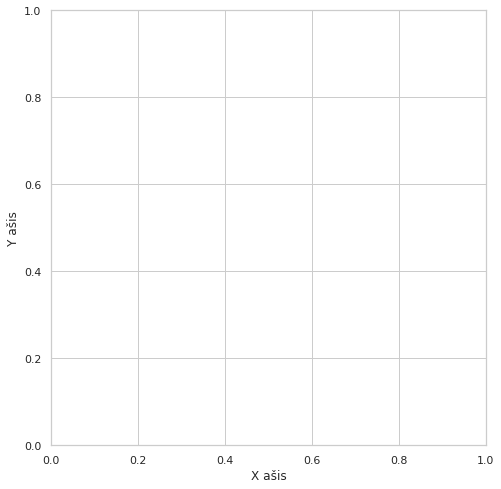

In [ ]:
# DRAW 2D
sns.set_theme(style="whitegrid")

f, ax = plt.subplots(figsize=(8, 8))
f.gca().set_aspect('equal', adjustable='box')
plt.xlabel("X ašis")
plt.ylabel("Y ašis")

for i in range(ds_count):
  color = "#%06x" % random.randint(0, 0xFFFFFF)
  # sns.kdeplot(x=xy[i][0], y=xy[i][1], levels=5, color=color, linewidths=1)
  sns.scatterplot(x=xy[i][0], y=xy[i][1], color=color, edgecolor=color, s=20, alpha=0.5)
  plt.scatter(x=tl_results[i][0], y=tl_results[i][1], marker="o", edgecolors="black", color="red", s=50)
  plt.scatter(x=ds[i].x, y=ds[i].y, marker="o", edgecolors="black", color="green", s=50)


sns.kdeplot(x=x, y=y, levels=5, color="black", linewidths=2) # Circles
sns.regplot(x=x, y=y, color="orange", scatter=False, ci = 1) # Regression
plt.scatter(x=x_avg, y=y_avg, marker="o", edgecolors="black", color="orange", s=100) # Mixture Average
plt.scatter(x=mean_tmp[0], y=mean_tmp[1], marker="o", edgecolors="black", color="blue", s=100) # Mixture Mean

x1, y1 = [mean_tmp[0]-3, mean_tmp[0]+3], [mean_tmp[1]-3*slope2D, mean_tmp[1]+3*slope2D] # Slope
# plt.plot(x1, y1, marker = 'o', color='red')

sns.lineplot(x=x1, y=y1, color="blue", linewidth=2)

# 3D vizualization

In [ ]:
ipv.figure()

# Dosimeters
for d in ds:
  ipv.scatter(d.x, d.y, np.array([d.z]), size=3, color="green", marker="sphere")

# Calcutated trilateration results
ipv.scatter(tl_results.T[0], tl_results.T[1], tl_results.T[2], size=3, color="red", marker="sphere")

# Generated points
# ipv.scatter(gen_points[0], gen_points[1], gen_points[2], size=1, color="grey", marker="sphere")

# Mixture density maximum
ipv.scatter(np.array([mix_max_3d[0]]), np.array([mix_max_3d[1]]), np.array([mix_max_3d[2]]),  size=5, color="blue", marker="sphere")

# Orientation
x_offset = (src_len / 2) / math.sqrt(1 + slope_XY**2 + slope_XZ**2)
startpoint = [mix_max_3d[0]-x_offset, mix_max_3d[1]-x_offset*slope_XY, mix_max_3d[2]-x_offset*slope_XZ]
endpoint = [mix_max_3d[0]+x_offset, mix_max_3d[1]+x_offset*slope_XY, mix_max_3d[2]+x_offset*slope_XZ]
ipv.pylab.plot(x=np.array([startpoint[0],endpoint[0]]), y=np.array([startpoint[1],endpoint[1]]), z=np.array([startpoint[2],endpoint[2]]), color='black', cast_shadow=True, receive_shadow=True)

ipv.show()

In [ ]:
pip install ipyvolume

In [ ]:

import seaborn as sns # 2D plotting
import matplotlib.pyplot as plt # 3D plotting ?

import ipyvolume as ipv # 3D interaktyvus atvaizdavimas
from google.colab import output # 3D visualizing
output.enable_custom_widget_manager() # 3D visualizing
# import re, seaborn as sns

# from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # 3D visualizing

In [ ]:
# doesnt work on colab

from google.colab import output
output.enable_custom_widget_manager()

# only x is a sequence of arrays
x = np.array([[-1, -0.8], [1, -0.1], [0., 0.5]])
y = np.array([0.0, 0.0])
z = np.array([0.0, 0.0])
ipv.figure()
s = ipv.scatter(x, y, z, marker='sphere', size=10)
ipv.xyzlim(-1, 1)
ipv.animation_control(s) # shows controls for animation controls
ipv.show()

In [ ]:
import numpy as np
import plotly.graph_objects as go
from scipy import ndimage

# Generate nicely looking random 3D-field
np.random.seed(0)
l = 30
X, Y, Z = np.mgrid[:l, :l, :l]
vol = np.zeros((l, l, l))
pts = temp.astype(np.int)
vol[tuple(indices for indices in pts)] = 1
vol = ndimage.gaussian_filter(vol, 4)
vol /= vol.max()

fig = go.Figure(data=go.Volume(
    x=X.flatten(), y=Y.flatten(), z=Z.flatten(),
    value=vol.flatten(),
    isomin=0.2,
    isomax=0.7,
    opacity=0.1,
    surface_count=25,
    ))
fig.update_layout(scene_xaxis_showticklabels=False,
                  scene_yaxis_showticklabels=False,
                  scene_zaxis_showticklabels=False)
fig.show()

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

x = y = np.arange(6)
z = np.arange(9)

fig = go.Figure()
fig.add_trace(go.Scatter3d
  (
    mode='markers',
    x=pts[0],
    y=pts[1],
    z=pts[2],
    marker=dict(color=px.colors.qualitative.D3, size=[50, 50, 50], sizemode='diameter')
  )
)

np.random.seed(0)
l = 30
X, Y, Z = np.mgrid[:l, :l, :l]
vol = np.zeros((l, l, l))
pts = (l * np.random.rand(3, 15)).astype(np.int)
vol[tuple(indices for indices in pts)] = 1

vol = ndimage.gaussian_filter(vol, 4)
vol /= vol.max()

fig = go.Figure(data=go.Volume(
    x=X.flatten(), y=Y.flatten(), z=Z.flatten(),
    value=vol.flatten(),
    isomin=0.2,
    isomax=0.7,
    opacity=0.1,
    surface_count=25,
    ))

fig.show()

# fig.update_layout(
#   scene = dict(
#     xaxis = dict(nticks=4, range=[0,6],),
#     yaxis = dict(nticks=4, range=[0,6],),
#     zaxis = dict(nticks=4, range=[0,9],),),
#   width=700,
#   margin=dict(r=20, l=10, b=10, t=10))

# Modeling source location

In [ ]:
pip install ipyvolume

In [ ]:
import ipyvolume as ipv
import numpy as np

In [ ]:
def DosimeterCoordinatesToArray(ds):
  dosimeter_coordinates = []

  for d in ds:
    dosimeter_coordinates.append([float(d.x), float(d.y), float(d.z)])

  return np.array(dosimeter_coordinates)

def StringArrayToFloat(xs):
  xs_f = []
  
  for x in xs:
    xs_f.append(float(x))

  return np.array(xs_f)

In [ ]:
test_data = CsvToArray('/content/test_log.csv')

test_data = test_data[145:-75]

xs_f = StringArrayToFloat(test_data.T[3])
ys_f = StringArrayToFloat(test_data.T[4])
zs_f = StringArrayToFloat(test_data.T[5])

In [ ]:
import ipyvolume as ipv
import numpy as np
fig = ipv.figure()
ipv.pylab.xlim(0, 6)
ipv.pylab.ylim(0, 6)
ipv.pylab.zlim(0, 9)

ipv.scatter(dosimeter_coordinates.T[0], dosimeter_coordinates.T[1], dosimeter_coordinates.T[2], size=5, color="green", marker="sphere")
ipv.pylab.plot(x=np.array([1, 1]), y=np.array([5, 5]), z=np.array([0, 8]), color='black', cast_shadow=True, receive_shadow=True)
ipv.pylab.plot(x=np.array([5, 5]), y=np.array([4, 4]), z=np.array([0, 8]), color='black', cast_shadow=True, receive_shadow=True)
ipv.pylab.plot(x=np.array([2, 2]), y=np.array([1, 1]), z=np.array([0, 8]), color='black', cast_shadow=True, receive_shadow=True)

ipv.scatter(xs_f, ys_f, zs_f, size=3, color="blue", marker="sphere")

ipv.show()

# Visualising Radiation accumulation

In [ ]:
test_data_float = StringArrayToFloat(test_data.T[0])

In [ ]:
temp = 0

for i in range(len(test_data_float)-1):
  temp += test_data_float[i+1] - test_data_float[i]

In [ ]:
len(test_data_float) * 18

81522

In [ ]:
temp / len(test_data_float)

18.261426363435636

In [ ]:
temp / len(test_data_float)

44522.82843894899

In [ ]:
test_data = CsvToArray('/content/test25_log.csv')

test_data = test_data[145:-75]

step = round(500 / 18.261426363435636)

visual_data = []
for i in range(0, len(test_data), 1):
  visual_data.append(test_data[i][3:6])

visual_data = np.array(visual_data)

xs_f = StringArrayToFloat(visual_data.T[0])
ys_f = StringArrayToFloat(visual_data.T[1])
zs_f = StringArrayToFloat(visual_data.T[2])

In [ ]:
gen_xs = np.array([])
gen_ys = np.array([])
gen_zs = np.array([])

for i in range(len(xs_f)):
  gen_x, gen_y, gen_z = np.random.multivariate_normal([xs_f[i], ys_f[i], zs_f[i]], [[0.1, 0, 0], [0, 0.1, 0], [0, 0, 0.1]], 5).T
  gen_xs = np.append(gen_xs, gen_x)
  gen_ys = np.append(gen_ys, gen_y)
  gen_zs = np.append(gen_zs, gen_z)

In [ ]:
import ipyvolume as ipv
import numpy as np
fig = ipv.figure()
ipv.pylab.xlim(0, 6)
ipv.pylab.ylim(0, 6)
ipv.pylab.zlim(0, 9)

ipv.scatter(dosimeter_coordinates.T[0], dosimeter_coordinates.T[1], dosimeter_coordinates.T[2], size=5, color="green", marker="sphere")
ipv.pylab.plot(x=np.array([1, 1]), y=np.array([5, 5]), z=np.array([0, 8]), color='black', cast_shadow=True, receive_shadow=True)
ipv.pylab.plot(x=np.array([5, 5]), y=np.array([4, 4]), z=np.array([0, 8]), color='black', cast_shadow=True, receive_shadow=True)
ipv.pylab.plot(x=np.array([2, 2]), y=np.array([1, 1]), z=np.array([0, 8]), color='black', cast_shadow=True, receive_shadow=True)

# ipv.scatter(xs_f, ys_f, zs_f, size=2, color="blue", marker="sphere")

ipv.scatter(gen_xs, gen_ys, gen_zs, size=0.4, color="red", marker="sphere")

ipv.show()

# Visualising trilateration combinatorics

In [ ]:
# Real Distances
# Exp

# def RunLocalizationTestLog(ds, ds_data):
ds_data, timestamps = CsvToDosimeterDataArray('/content/test25.csv')

min_ds = 4
test_results = []

i = 1700
# setting dosimeter radiation
for j in range(len(ds)):
  radiation = float(ds_data[j][i])
  if (radiation > 0.0032):
    ds[j].r = radiation
  else:
    ds[j].r = 0
RadiationToDistanceLog(ds)

no_zeros_ds = []
for d in ds:
  if (d.r != 0):
    no_zeros_ds.append(d)

# Calculating with exhaustinve trilateration
tl_results = []
combinations = list(itertools.combinations(no_zeros_ds, min_ds))
for combo in combinations:
  try:
    res = Trilateration3D(combo)
    tl_results.append(res)
  except ZeroDivisionError:
    None

# Calculating highest density value
if (len(tl_results) > 0):
  test_results.append(MixtureDensityMaximum3D(np.array(tl_results)))
else:
  test_results.append([0,0,0])

test_results


[array([2.93093093, 2.98598599, 5.9039039 ])]

In [ ]:
tr = np.array(test_results[0])

In [ ]:
tl_results = np.array(tl_results)

In [ ]:
import ipyvolume as ipv
import numpy as np
fig = ipv.figure()
ipv.pylab.xlim(0, 6)
ipv.pylab.ylim(0, 6)
ipv.pylab.zlim(0, 9)

ipv.scatter(np.array([3]), np.array([3]), np.array([6]), size=5, color="yellow", marker="sphere")
ipv.scatter(np.array([tr[0]]), np.array([tr[1]]), np.array([tr[2]]), size=5, color="blue", marker="sphere")
ipv.scatter(tl_results.T[0], tl_results.T[1], tl_results.T[2], size=3, color="red", marker="sphere")
ipv.scatter(dosimeter_coordinates.T[0], dosimeter_coordinates.T[1], dosimeter_coordinates.T[2], size=5, color="green", marker="sphere")
ipv.pylab.plot(x=np.array([1, 1]), y=np.array([5, 5]), z=np.array([0, 8]), color='black', cast_shadow=True, receive_shadow=True)
ipv.pylab.plot(x=np.array([5, 5]), y=np.array([4, 4]), z=np.array([0, 8]), color='black', cast_shadow=True, receive_shadow=True)
ipv.pylab.plot(x=np.array([2, 2]), y=np.array([1, 1]), z=np.array([0, 8]), color='black', cast_shadow=True, receive_shadow=True)

ipv.show()

In [ ]:
tl_results

# Trying alternatives

In [ ]:
def GenerateSourceLine(src_x, src_y, src_z, src_len):
  src_xs, src_ys, src_zs = [], [], []
  offset = src_len / (2 * math.sqrt(3))
  axis_step = 0.2 / math.sqrt(3)

  i = 0
  while 0.2 * i < src_len:
    src_xs.append(src_x - offset + axis_step * i)
    src_ys.append(src_y - offset + axis_step * i)
    src_zs.append(src_z - offset + axis_step * i)
    i += 1

  return [np.array([src_xs]), np.array([src_ys]), np.array([src_zs])]

def dist(s, e):
  d = math.sqrt(sq(s[0] - e[0]) + sq(s[1] - e[1]) + sq(s[2] - e[2]))
  return d

In [ ]:
filtered_results = []
filtered_off_results = []
res_avg_dist = 0
for res in tl_results:
  res_avg_dist += dist(mix_max_3d, res)

res_avg_dist /= len(tl_results)

for res in tl_results:
  if (dist(mix_max_3d, res) < res_avg_dist*2):
    filtered_results.append(res)
  else:
    filtered_off_results.append(res)

len(filtered_results)

113

In [ ]:
np.array(filtered_off_results).T

array([[ 67.33779358,  49.13549529,  43.94485563,  16.81649619,
         12.78634492,   5.7997607 , -45.47595432,  11.53327287,
         43.96411101,  14.70715334,  88.97847461,  15.67545468,
         14.82911676],
       [ 17.02934578,  20.00449162,   9.00068484,  32.10855524,
         25.80212259,  25.9750558 ,  34.34297231,  25.98581428,
         20.78822122,  25.49322477,  13.96623946,  25.8921036 ,
         33.60299132],
       [ 25.45181984,  25.74691614,  23.00987684,  25.37762496,
         25.25404404,  24.90696407,  18.79771967,  25.11518512,
         25.36707876,  25.26100791,  28.67337686,  25.1841637 ,
         25.64966753]])

In [ ]:
# CALC SPEEEEED
# generate data
# n = 500
# gen_points = [np.array([]), np.array([]), np.array([])]
# for rez in filtered_results:
#   x, y, z = np.random.multivariate_normal([rez[0], rez[1], rez[2]], [[1,0,0], [0,1,0], [0,0,1]], n).T  
#   gen_points[0] = np.append(gen_points[0], x)
#   gen_points[1] = np.append(gen_points[1], y)
#   gen_points[2] = np.append(gen_points[2], z)

# covariance using generated points
mix_cov_3d = np.cov(np.array(filtered_results).T)
slope_XY = mix_cov_3d[0][1] / mix_cov_3d[0][0]
slope_XZ = mix_cov_3d[0][2] / mix_cov_3d[0][0]

print(mix_max_3d)
print(slope_XY)
print(slope_XZ)
print(mix_cov_3d)

[25.4954955  25.24024024 25.13813814]
-0.24480060157099376
0.101306440822896
[[ 6.94326387 -1.69971517  0.70339735]
 [-1.69971517  1.82359364  0.08373514]
 [ 0.70339735  0.08373514  0.41144981]]


In [ ]:
# Filtering off unlikely in between results

src_line = GenerateSourceLine(25, 25, 25, 15)

ipv.figure()
for res in filtered_results:
  ipv.scatter(np.array([res[0]]), np.array([res[1]]), np.array([res[2]]), size=3, color="red", marker="sphere")

# i = 0
# for i in range(len(src_line[0])):
ipv.scatter(src_line[0], src_line[1], src_line[2], size=2, color="grey", marker="sphere")

for d in ds:
  ipv.scatter(np.array([d.x]), np.array([d.y]), np.array([d.z]), size=3, color="green", marker="sphere")

ipv.scatter(np.array([mix_max_3d[0]]), np.array([mix_max_3d[1]]), np.array([mix_max_3d[2]]),  size=5, color="blue", marker="sphere")

x_offset = (src_len / 2) / math.sqrt(1 + slope_XY**2 + slope_XZ**2)
startpoint = [mix_max_3d[0]-x_offset, mix_max_3d[1]-x_offset*slope_XY, mix_max_3d[2]-x_offset*slope_XZ]
endpoint = [mix_max_3d[0]+x_offset, mix_max_3d[1]+x_offset*slope_XY, mix_max_3d[2]+x_offset*slope_XZ]
ipv.pylab.plot(x=np.array([startpoint[0],endpoint[0]]), y=np.array([startpoint[1],endpoint[1]]), z=np.array([startpoint[2],endpoint[2]]), color='black', cast_shadow=True, receive_shadow=True)

ipv.show()

print(startpoint)
print(endpoint)


[18.245616596034797, 27.015014956145073, 24.40367871043676]
[32.7453743949562, 23.465465524335407, 25.872597565839516]


In [ ]:
dist(startpoint, endpoint)

In [ ]:
import ipyvolume as ipv
import numpy as np
x, y, z = np.array(tmp_x), np.array(tmp_y), np.array(tmp_z)

ipv.figure()
ipv.scatter(np.array(xyz[i][0]), np.array(xyz[i][1]), np.array(xyz[i][2]), size=1, color=color, marker="sphere")
for i in range(9):
  color = "#%06x" % random.randint(0, 0xFFFFFF)
  ipv.scatter(np.array([tl_results[i][0]]), np.array([tl_results[i][1]]), np.array([tl_results[i][2]]), size=3, color="red", marker="sphere")
  ipv.scatter(np.array([ds[i].x]), np.array([ds[i].y]), np.array([ds[i].z]), size=3, color="green", marker="sphere")

ipv.scatter(np.array([mean3d[0]]), np.array([mean3d[1]]), np.array([mean3d[2]]),  size=7, color="blue", marker="sphere")

x_offset = (src_len / 2) / math.sqrt(1 + slope_XY**2 + slope_XZ**2)
startpoint = [mean3d[0]-x_offset, mean3d[1]-x_offset*slope_XY, mean3d[2]-x_offset*slope_XZ]
endpoint = [mean3d[0]+x_offset, mean3d[1]+x_offset*slope_XY, mean3d[2]+x_offset*slope_XZ]
ipv.pylab.plot(x=np.array([startpoint[0],endpoint[0]]), y=np.array([startpoint[1],endpoint[1]]), z=np.array([startpoint[2],endpoint[2]]), color='red', cast_shadow=True, receive_shadow=True)

ipv.show()

print(startpoint)
print(endpoint)


[2.1578011410102103, 6.115224746819995, 6.485641755715772]
[9.66402068081161, -0.41152104311629145, 7.514358244284228]


In [ ]:
math.sqrt((startpoint[0]-endpoint[0])**2 + (startpoint[1]-endpoint[1])**2 + (startpoint[2]-endpoint[2])**2)

10.0

In [ ]:
import plotly.graph_objects as go
import numpy as np
  
x1 = np.linspace(-4, 4, 9) 
y1 = np.linspace(-5, 5, 11) 
z1 = np.linspace(-5, 5, 11) 
  
X, Y, Z = np.meshgrid(x1, y1, z1)
  
values = (np.sin(X**2 + Y**2))/(X**2 + Y**2)
  
fig = go.Figure(data=go.Volume(
    x=X.flatten(),
    y=Y.flatten(),
    z=Z.flatten(),
    value=values.flatten(),
    opacity=0.1,
    ))
  
fig.show()

# Data formatting

In [ ]:
pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import csv
from google.colab import files

In [ ]:
# Converting txt file to csv
def TxtToCsv(file_path):
  read_file = pd.read_csv(file_path)
  csv_file_path = file_path[:-3] + 'csv'
  read_file.to_csv(csv_file_path, index=None)

  return csv_file_path

# Reading dosimeter data from csv file to np array
def CsvToDosimeterDataArray(csv_file_path):
  csv_file = open(csv_file_path)
  csvreader = csv.reader(csv_file)

  header = []
  header = next(csvreader)

  rows = []
  for row in csvreader:
    rows.append(row)

  ds_data = np.array(rows).T[2:]
  ds_data_timestamp = np.array(rows).T[1]

  return ds_data, ds_data_timestamp

def CsvToArray(csv_file_path):
  csv_file = open(csv_file_path)
  csvreader = csv.reader(csv_file)

  header = []
  header = next(csvreader)

  rows = []
  for row in csvreader:
    rows.append(row)
  data = np.array(rows)

  return data

# Writing localization test results to csv
def WriteResultsToCsv(file_path, test_results):
  res_file_path = file_path[:9] + 'res_' + file_path[9:-3] + 'csv'
  res_file = open(res_file_path, 'w')

  header = ['time', 'x', 'y','z']  

  with open(res_file_path, 'w') as f: 
    write = csv.writer(f) 
    write.writerow(header) 
    write.writerows(test_results)

  return True

def WriteSimplifiedResultsToCsv(file_path, test_results):
  res_file_path = file_path[:9] + 'res_' + file_path[9:-3] + 'csv'
  res_file = open(res_file_path, 'w')

  header = ['time', 'z']  

  with open(res_file_path, 'w') as f: 
    write = csv.writer(f) 
    write.writerow(header) 
    write.writerows(test_results)

  return True

def WriteResultsToCsv(file_name, test_results, header):
  res_file_path = '/content/' + file_name + '.csv'
  res_file = open(res_file_path, 'w')

  # header = ['time', 'z']  

  with open(res_file_path, 'w') as f: 
    write = csv.writer(f) 
    write.writerow(header) 
    write.writerows(test_results)

  return True


In [ ]:
# temporaty functio to add timestamp column to complete calculations

def AddTimestamp(file_path):
  csv_file_path = file_path[:-3] + 'csv'
  res_file_path = file_path[:9] + 'res_' + file_path[9:-3] + 'csv'
  res_file_path_wts = file_path[:9] + 'res_wst_' + file_path[9:-3] + 'csv'

  csv_file = open(csv_file_path)
  csvreader = csv.reader(csv_file)
  header = []
  header = next(csvreader)
  rows = []
  for row in csvreader:
    rows.append(row)
  ds_data_timestamps = np.array(rows).T[1]

  csv_file = open(res_file_path)
  csvreader = csv.reader(csv_file)
  header = []
  header = next(csvreader)
  rows = []
  for row in csvreader:
    rows.append(row)
  tl_results = np.array(rows).T

  results_wts = np.array([ds_data_timestamps, tl_results[0], tl_results[1], tl_results[2]])

  header = ['time', 'x', 'y','z']  

  with open(res_file_path_wts, 'w') as f: 
    write = csv.writer(f) 
    write.writerow(header) 
    write.writerows(results_wts.T)

# Distance to radiation  exponent fitting

In [ ]:
from scipy.optimize import curve_fit

# Marks soruce z values for timestamps returns only list of z values
def MarkZValues(csv_file_path, step_time, start_coordinate, dosimeter_number):
  dosimeter_radiation, timestamps = CsvToDosimeterDataArray(csv_file_path)
  src_locations = np.zeros(len(timestamps))

  start = False
  timer_count = timer_count_global
  loc = 0
  curr_step_count = 0
  step_time = step_time_global

  for i in range(len(dosimeter_radiation[0])-1):
    # find where non noise radiation starts (picks up the first spike in radiation data)
    if (float(dosimeter_radiation[dosimeter_number][i]) > 0.02 and start == False):
      start = True
      loc = start_coordinate
    
    # marks z locations
    if (start == True):
      timer_count += int(timestamps[i+1]) - int(timestamps[i])
      if (timer_count >= step_time * step_margin_global and timer_count <= step_time * (1 - step_margin_global)):
        src_locations[i] = loc

      # calculates when is next step
      if (timer_count >= step_time):
        timer_count -= step_time
        loc -= 0.5
        curr_step_count += 1

      # Checks when to end
      if (curr_step_count == step_count_global):
        break

  return src_locations

# Marks soruce z values for timestamps returns only list of z values
def MarkZValuesDirty(csv_file_path, step_time, start_coordinate, dosimeter_number):
  dosimeter_radiation, timestamps = CsvToDosimeterDataArray(csv_file_path)
  src_locations = np.zeros(len(timestamps))

  start = False
  timer_count = timer_count_global
  step_time = step_time_global
  loc = 0
  curr_step_count = 0

  for i in range(len(dosimeter_radiation[0])-1):
    # find where non noise radiation starts (picks up the first spike in radiation data)
    if (float(dosimeter_radiation[dosimeter_number][i]) > 0.02 and start == False):
      start = True
      loc = start_coordinate
    
    # marks z locations
    if (start == True):
      timer_count += int(timestamps[i+1]) - int(timestamps[i])
      src_locations[i] = loc

      # calculates when is next step
      if (timer_count >= step_time):
        timer_count -= step_time
        loc -= 0.5
        curr_step_count += 1

      # Checks when to end
      if (curr_step_count == step_count_global):
        break

  return src_locations

# Calcualtes Euclidean distances from dosimeter to source
def CalcDosimeterToSourceDistances(dosimeter, src_z_values, src_x = 0):
  distances_list = np.zeros(len(src_z_values))

  for i in range(len(src_z_values)):
    if (src_z_values[i] != 0):
      distances_list[i] = math.sqrt((src_z_values[i] - dosimeter.z)**2 + (src_x - dosimeter.x)**2) 

  return distances_list

def RemoveZeroValuesFromList(values_list):
  for i in reversed(range(len(values_list))):
    if (values_list[i] == 0):
      values_list = np.delete(values_list, i)

  return values_list

def RemoveZeroValuesFromLists(radiations, distances):
  for i in reversed(range(len(distances))):
    if (distances[i] == 0):
      radiations = np.delete(radiations, i)
      distances = np.delete(distances, i)

  return radiations, distances

def FitTwoLists(xs, ys):
  [a, b], res1 = curve_fit(lambda x1,a,b: a * np.exp(b * x1),  xs,  ys)

  return a, b

# note that not all test contain data for all dosimeters
def MapDistanceToRadiation(test_number, dosimeter_number):
  dosimeter = Dosimeter3D(x=TestNumberToXCoordinate(test_number), z=DosimeterNumberToZCoordinate(dosimeter_number+1))
  csv_file_path = '/content/test' + str(test_number) + '.csv'

  src_z_values = MarkZValues(csv_file_path, 2140, 8.5, dosimeter_number)
  d_to_src_distances = CalcDosimeterToSourceDistances(dosimeter, src_z_values)
  ds_radiation, timestamps = CsvToDosimeterDataArray(csv_file_path)
  d_radiation, d_to_src_distances = RemoveZeroValuesFromLists(ds_radiation[dosimeter_number], d_to_src_distances)

  d_radiation_float = np.zeros(len(d_radiation))
  for i in range(len(d_radiation)):
    d_radiation_float[i] = float(d_radiation[i])
# src_z_values = MarkZValues(csv_file_path, 2140, 8.5, dosimeter_number)
# src_z_values = RemoveZeroValuesFromList(src_z_values)

  return d_to_src_distances, d_radiation_float

# distance to radiation
def FittedExponent(x, a, b):
  y = a * np.exp(b * x)

  return y

# radiation to distance
def FittedLogarithm(y, a, b):
  x = np.log(y/a) / b

  return x

# generated data for plotting
def GenerateExpData(a, b, x_min, x_max, steps):
  step = (x_max - x_min) / steps

  xs = np.zeros(steps)
  ys = np.zeros(steps)
  i = 0
  while ((x_min + step * i) < x_max):
    xs[i] = x_min + step * i
    ys[i] = FittedExponent(xs[i], a, b)
    i += 1

  return xs, ys

def FitRadiationExpWithData(first_file, last_file, dosimeter_number):

  distances = np.array([], dtype=float)
  radiations = np.array([], dtype=float)

  for i in range(first_file, last_file+1):
    temp_distances, temp_radiations = MapDistanceToRadiation(i, dosimeter_number)
    distances = np.append(distances, temp_distances)
    radiations =  np.append(radiations, temp_radiations)

  a, b = FitTwoLists(distances, radiations)

  return a, b

# non universal functions for current tests automation
# only tests 4-9, 11-16, 18-23
def TestNumberToXCoordinate(num):
  if (num > 16):
    num -= 14
  elif (num > 9):
    num -= 7
  num -= 3

  return num

def DosimeterNumberToZCoordinate(num):
  z = 2
  if (num % 3 == 2):
    z += 3
  elif (num % 3 == 0):
    z += 6
  return z

In [ ]:
# Calculating dosimeter a and b approximations
dosimeter_exp_ab = np.zeros((9, 2))

for i in range(3):
  dosimeter_exp_ab[i] = FitRadiationExpWithData(4, 9, i)

for i in range(3, 6):
  dosimeter_exp_ab[i] = FitRadiationExpWithData(11, 16, i)

for i in range(6, 9):
  dosimeter_exp_ab[i] = FitRadiationExpWithData(18, 23, i)

dosimeter_exp_ab

In [ ]:
# Already Calculated dosimetere exponent koeficients
dosimeter_exp_ab = [
    [ 0.16801284, -0.37641622],
    [ 2.23576675, -1.13339008],
    [ 2.41308608, -1.45751485],
    [ 1.54596901, -0.92266818],
    [ 1.73770635, -1.01474088],
    [ 2.06235769, -1.19327526],
    [ 1.75301363, -1.03443367],
    [ 1.81073478, -1.07940669],
    [ 0.14224586, -0.37226811]
  ]

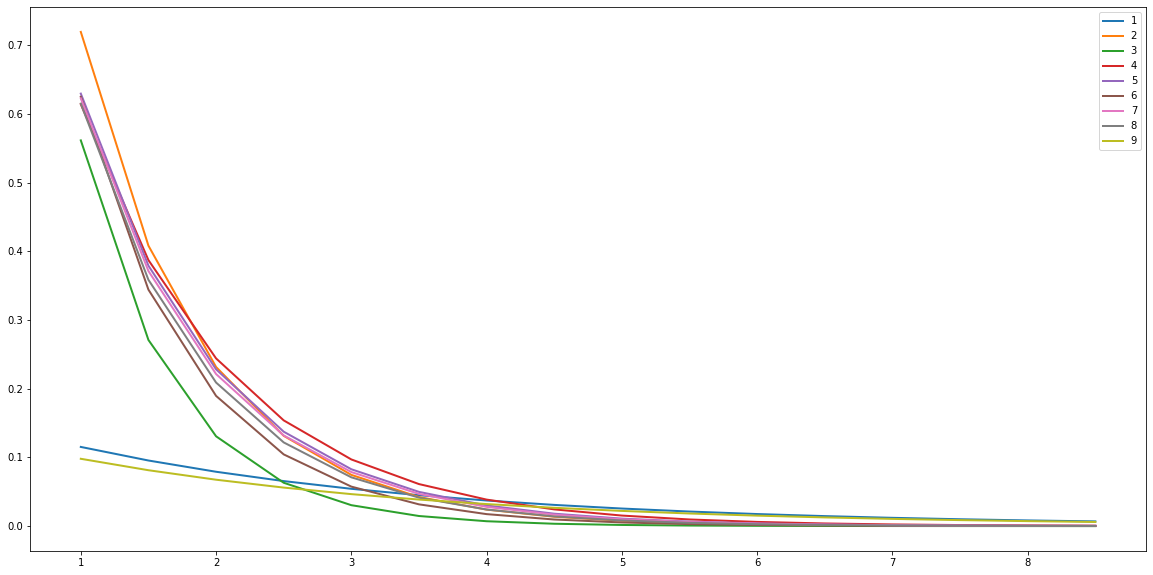

In [ ]:
# plotting radiation exponents
cs = ['red', 'green', 'blue', 'grey', 'purple', 'orange', 'yellow', 'turquoise', 'violet']
fig, ax = plt.subplots(figsize=(20, 10))

for i in range(9):
  xs, ys = GenerateExpData(dosimeter_exp_ab[i][0], dosimeter_exp_ab[i][1], 1, 9, 16)
  sns.lineplot(x=xs, y=ys, legend='full', label=str(i+1), linewidth=2)
plt.show()

# Localization

In [ ]:
import math
import numpy as np
import itertools # Dosimeter combinations for trilateration
from scipy.stats import norm # Gaussian distribution

from scipy.stats import multivariate_normal # Gaussian multivariate distribution
import random
from numba import jit # code exection optimisation

In [ ]:
class Dosimeter3D:
  def __init__ (self, x=None, y=None, z=None, r=None):
    self.x = x
    self.y = y
    self.z = z
    self.r = r

  def print(self):
    print(self.x, ' ', self.y, ' ', self.z, ' ', self.r)

In [ ]:
# Misc
def sq(val):
  return val**2

# ------------------------
#  Trilateration
# ------------------------

def Trilateration3D(ds):
  x1, y1, z1, r1 = ds[0].x,      ds[0].y,      ds[0].z,      ds[0].r**2
  x2, y2, z2, r2 = ds[1].x - x1, ds[1].y - y1, ds[1].z - z1, ds[1].r**2
  x3, y3, z3, r3 = ds[2].x - x1, ds[2].y - y1, ds[2].z - z1, ds[2].r**2
  x4, y4, z4, r4 = ds[3].x - x1, ds[3].y - y1, ds[3].z - z1, ds[3].r**2

  r21 = r2 - r1
  r31 = r3 - r1
  r41 = r4 - r1

  t2 = sq(x2) + sq(y2) + sq(z2)
  t3 = sq(x3) + sq(y3) + sq(z3)
  t4 = sq(x4) + sq(y4) + sq(z4)

  xu1 = z2*(r41 - t4) + z4*(t2 - r21)
  xu2 = y2*z3 - y3*z2
  xu3 = z2*(r31 - t3) + z3*(t2 - r21)
  xu4 = y2*z4 - y4*z2
  xu = xu1 * xu2 - xu3 * xu4
  xl1 = (x2 * z4 - x4 * z2) * (y2 * z3 - y3 * z2)
  xl2 = (x2 * z3 - x3 * z2) * (y2 * z4 - y4 * z2)
  xl = 2 * (xl1 - xl2)
  x = xu / xl
  if (math.isinf(x) or math.isnan(x)):
    raise ZeroDivisionError

  yu1 = z2 * (r31 - t3)
  yu2 = z3 * (t2 - r21)
  yu3 = 2 * x * (x2 * z3 - x3 * z2)
  yu = yu1 + yu2 - yu3
  yl = 2 * (y2 * z3 - y3 * z2)
  y = yu / yl

  z = (t2 - r21 - 2 * x * x2 - 2 * y * y2) / (2 * z2)

  return [(x+x1), (y+y1), (z+z1)]

def Trilateration3DProportionalDistances (ds):
  x1, y1, z1, r1 = ds[0].x,      ds[0].y,      ds[0].z,      ds[0].r**2
  x2, y2, z2, r2 = ds[1].x - x1, ds[1].y - y1, ds[1].z - z1, ds[1].r**2
  x3, y3, z3, r3 = ds[2].x - x1, ds[2].y - y1, ds[2].z - z1, ds[2].r**2
  x4, y4, z4, r4 = ds[3].x - x1, ds[3].y - y1, ds[3].z - z1, ds[3].r**2
  x5, y5, z5, r5 = ds[4].x - x1, ds[4].y - y1, ds[4].z - z1, ds[4].r**2

  r21 = r2 - r1
  r31 = r3 - r1
  r41 = r4 - r1
  r51 = r5 - r1

  x23 = x2*r31-x3*r21
  x24 = x2*r41-x4*r21
  x25 = x2*r51-x5*r21
  y23 = y2*r31-y3*r21
  y24 = y2*r41-y4*r21
  y25 = y2*r51-y5*r21
  z23 = z2*r31-z3*r21
  z24 = z2*r41-z4*r21
  z25 = z2*r51-z5*r21

  t2 = sq(x2) + sq(y2) + sq(z2)
  t3 = sq(x3) + sq(y3) + sq(z3)
  t4 = sq(x4) + sq(y4) + sq(z4)
  t5 = sq(x5) + sq(y5) + sq(z5)

  xu1 = z23*(t4*r21 - t2*r41) - z24*(t3*r21 - t2*r31)
  xu2 = y25*z23 - y23*z25
  xu3 = z23*(t5*r21 - t2*r51) - z25*(t3*r21 - t2*r31)
  xu4 = y24*z23 - y23*z24
  xu = xu1 * xu2 - xu3 * xu4
  xl1 = (x25 * z23 - x23 * z25) * (y24 * z23 - y23 * z24)
  xl2 = (x24 * z23 - x23 * z24) * (y25 * z23 - y23 * z25)
  xl = 2 * (xl1 - xl2)
  x = xu / xl
  if (math.isinf(x) or math.isnan(x)):
    raise ZeroDivisionError

  yu1 = z24 * (t3 * r21 - t2 * r31)
  yu2 = z23 * (t4 * r21 - t2 * r41)
  yu3 = 2 * x * (x24 * z23 - x23 * z24)
  yu = yu1 - yu2 - yu3
  yl = 2 * (y24 * z23 - y23 * z24)
  y = yu / yl

  z = (t2 * r31 - t3 * r21 - 2 * x * x23 - 2 * y * y23) / (2 * z23)

  return [(x+x1), (y+y1), (z+z1)]

def Trilateration3DSimplified (ds, src_x, src_y):
  x1, y1, z1, r1 = ds[0].x,      ds[0].y,      ds[0].z,      ds[0].r**2
  x2, y2, z2, r2 = ds[1].x - x1, ds[1].y - y1, ds[1].z - z1, ds[1].r**2
  x3, y3, z3, r3 = ds[2].x - x1, ds[2].y - y1, ds[2].z - z1, ds[2].r**2
  x, y = (src_x - x1), (src_y - y1)

  r21 = r2 - r1
  r31 = r3 - r1

  zu1 = (sq(x2) - 2*x2*x + sq(y2) - 2*y2*y + sq(z2)) * r31
  zu2 = (sq(x3) - 2*x3*x + sq(y3) - 2*y3*y + sq(z3)) * r21
  zl = 2*(z2 * r31 - z3 * r21)
  z = (zu1 - zu2) / zl
  if (math.isinf(z) or math.isnan(z)):
    raise ZeroDivisionError

  return z+z1

def Trilateration3DSimplifiedLog (ds, src_x, src_y):
  x1, y1, z1, r1 = ds[0].x,      ds[0].y,      ds[0].z,      ds[0].r**2
  x2, y2, z2, r2 = ds[1].x - x1, ds[1].y - y1, ds[1].z - z1, ds[1].r**2
  x, y = (src_x - x1), (src_y - y1)

  r21 = r2 - r1
  t2 = sq(x2) + sq(y2) + sq(z2)

  zu = t2 - r21 - 2*x2*x - 2*y2*y
  zl = 2 * z2
  z = zu / zl
  if (math.isinf(z) or math.isnan(z)):
    raise ZeroDivisionError

  return z+z1

# ------------------------
#  Radiation to distance
# ------------------------

def RadiationToDistanceNthRoot(ds, n):
  for d in ds:
    if (d.r != 0):
      d.r = 1 / (d.r ** (1/n))

  return ds

def RadiationToDistanceLog(ds):
  # using previously calculated log values
  ds_ab = [
    [ 0.16801284, -0.37641622],
    [ 2.23576675, -1.13339008],
    [ 2.41308608, -1.45751485],
    [ 1.54596901, -0.92266818],
    [ 1.73770635, -1.01474088],
    [ 2.06235769, -1.19327526],
    [ 1.75301363, -1.03443367],
    [ 1.81073478, -1.07940669],
    [ 0.14224586, -0.37226811]
  ]

  for i in range(len(ds)):
    if (ds[i].r != 0):
      ds[i].r = float(np.log(ds[i].r / ds_ab[i][0]) / ds_ab[i][1])

  return ds

# ------------------------
#  Dosimeter combinatorics
# ------------------------

# zero_divisions_count = 0
# def ExhaustiveTrilateration(ds):
#   tl_results = np.array([])
#   global zero_divisions_count

#   combinations = list(itertools.combinations(ds, 5))
#   for combo in combinations:
#     try:
#       rez = Trilateration3D(combo)
#       tl_results = np.append(tl_results, rez)
#     except ZeroDivisionError:
#       zero_divisions_count += 1
      
#   return tl_results

# def ExhaustiveSimplifiedTrilateration(ds):
#   tl_results = []
#   global zero_divisions_count

#   combinations = list(itertools.combinations(ds, 3))
#   for combo in combinations:
#     try:
#       rez = TrilaterationSimplified(combo, 3, 3)
#       tl_results.append(rez)
#     except ZeroDivisionError:
#       None
      
#   return np.array(tl_results)

# def NonExhaustiveTrilateration(ds):
#   tl_results = []
#   ds_count = len(ds)

#   for i in range(ds_count):
#     if (ds_count - i >= ds_min):
#       rez = TrilaterationWithDistance3D(ds[i : i + ds_min])
#     else:
#       temp1 = ds[ : ds_min - (ds_count - i)]
#       temp2 = ds[i : ]
#       rez = TrilaterationWithDistance3D([*(temp1), *(temp2)])
#     tl_results.append(rez)

#   return np.array(tl_results)

# ------------------------
#  Mixture Maximum
# ------------------------

# @jit(nopython=True)
def MixtureDensityMaximum1D(xs):
  x_axis = np.linspace(-1, 10, 1000)
  scale = 0.06667
  mdf = 0
  len_xs = len(xs)

  # NOTE im using scale_global, that is declared somewhere globaly
  for x in xs:
    pdf = norm.pdf(x_axis, x, scale_global)
    mdf += (pdf / len_xs)

  return x_axis[np.argmax(mdf)]

def MixtureDensityMaximum3D(tl_results):
  calc_points = tl_results.T
  mix_max_3d = np.zeros(3)
  mix_max_3d[0] = MixtureDensityMaximum1D(calc_points[0])
  mix_max_3d[1] = MixtureDensityMaximum1D(calc_points[1])
  mix_max_3d[2] = MixtureDensityMaximum1D(calc_points[2])

  return mix_max_3d

# Test Functions

In [ ]:
# Proportional distances
# Square

def RunLocalizationTest(ds, ds_data):
  min_ds = 5
  test_results = []

  for i in range(len(ds_data[0])):
    # setting dosimeter radiation
    for j in range(len(ds)):
      radiation = float(ds_data[j][i])
      if (radiation > 0.0032):
        ds[j].r = radiation
      else:
        ds[j].r = 0
    RadiationToDistanceNthRoot(ds, 2)

    no_zeros_ds = []
    for d in ds:
      if (d.r != 0):
        no_zeros_ds.append(d)

    # Calculating with exhaustinve trilateration
    tl_results = []
    combinations = list(itertools.combinations(no_zeros_ds, min_ds))
    for combo in combinations:
      try:
        tl_results.append(Trilateration3DProportionalDistances(combo))
      except ZeroDivisionError:
        None

    # Calculating highest density value
    if (len(tl_results) > 0):
      test_results.append(MixtureDensityMaximum3D(np.array(tl_results)))
    else:
      test_results.append([0,0,0])

  return test_results

def RunTest(ds, file_path, time=5150):
  ds_data, timestamps = CsvToDosimeterDataArray(TxtToCsv(file_path))
  z_values_dirty = MarkZValuesDirty(TxtToCsv(file_path), time, 8.5, 0)
  z_values_clean = MarkZValues(TxtToCsv(file_path), time, 8.5, 0)
  
  test_results = np.array(RunLocalizationTest(ds, ds_data))

  test_results_ts = np.column_stack((timestamps, z_values_dirty, z_values_clean, test_results.T[0],  test_results.T[1], test_results.T[2]))
  WriteResultsToCsv(file_path[9:-4] + '_sq', test_results_ts, ['time', 'real_z', 'clean_z', 'x', 'y', 'z'])

  return ('/content/' + file_path[9:-4] + '_sq.csv')

In [ ]:
# Real Distances
# Exp

def RunLocalizationTestLog(ds, ds_data):
  min_ds = 4
  test_results = []

  for i in range(len(ds_data[0])):
    # setting dosimeter radiation
    for j in range(len(ds)):
      radiation = float(ds_data[j][i])
      if (radiation > 0.0032):
        ds[j].r = radiation
      else:
        ds[j].r = 0
    RadiationToDistanceLog(ds)

    no_zeros_ds = []
    for d in ds:
      if (d.r != 0):
        no_zeros_ds.append(d)

    # Calculating with exhaustinve trilateration
    tl_results = []
    combinations = list(itertools.combinations(no_zeros_ds, min_ds))
    for combo in combinations:
      try:
        res = Trilateration3D(combo)
        tl_results.append(res)
      except ZeroDivisionError:
        None

    # Calculating highest density value
    if (len(tl_results) > 0):
      test_results.append(MixtureDensityMaximum3D(np.array(tl_results)))
    else:
      test_results.append([0,0,0])

  return test_results

def RunTestLog(ds, file_path, time=5150):
  ds_data, timestamps = CsvToDosimeterDataArray(TxtToCsv(file_path))
  z_values_dirty = MarkZValuesDirty(TxtToCsv(file_path), time, 8.5, 0)
  z_values_clean = MarkZValues(TxtToCsv(file_path), time, 8.5, 0)

  test_results = np.array(RunLocalizationTestLog(ds, ds_data))
  
  test_results_ts = np.column_stack((timestamps, z_values_dirty, z_values_clean, test_results.T[0],  test_results.T[1], test_results.T[2]))
  WriteResultsToCsv(file_path[9:-4] + '_log', test_results_ts, ['time', 'real_z', 'clean_z', 'x', 'y', 'z'])

  return ('/content/' + file_path[9:-4] + '_log.csv')

In [ ]:
# Real Distances
# Exp

def RunLocalizationTestLogProportionalDistances(ds, ds_data):
  min_ds = 5
  test_results = []

  for i in range(len(ds_data[0])):
    # setting dosimeter radiation
    for j in range(len(ds)):
      radiation = float(ds_data[j][i])
      if (radiation > 0.0032):
        ds[j].r = radiation
      else:
        ds[j].r = 0
    RadiationToDistanceLog(ds)

    no_zeros_ds = []
    for d in ds:
      if (d.r != 0):
        no_zeros_ds.append(d)

    # Calculating with exhaustinve trilateration
    tl_results = []
    combinations = list(itertools.combinations(no_zeros_ds, min_ds))
    for combo in combinations:
      try:
        res = Trilateration3DProportionalDistances(combo)
        tl_results.append(res)
      except ZeroDivisionError:
        None

    # Calculating highest density value
    if (len(tl_results) > 0):
      test_results.append(MixtureDensityMaximum3D(np.array(tl_results)))
    else:
      test_results.append([0,0,0])

  return test_results

def RunTestLogProportionalDistances(ds, file_path, time=5150):
  ds_data, timestamps = CsvToDosimeterDataArray(TxtToCsv(file_path))
  z_values_dirty = MarkZValuesDirty(TxtToCsv(file_path), time, 8.5, 0)
  z_values_clean = MarkZValues(TxtToCsv(file_path), time, 8.5, 0)

  test_results = np.array(RunLocalizationTestLogProportionalDistances(ds, ds_data))
  
  test_results_ts = np.column_stack((timestamps, z_values_dirty, z_values_clean, test_results.T[0],  test_results.T[1], test_results.T[2]))
  WriteResultsToCsv(file_path[9:-4] + '_log_pd', test_results_ts, ['time', 'real_z', 'clean_z', 'x', 'y', 'z'])

  return ('/content/' + file_path[9:-4] + '_log_pd.csv')

In [ ]:
# Proportional distances
# Square
# Simplified

def RunLocalizationTestSimplified(ds, ds_data, src_x=3, src_y=3):
  min_ds = 3
  test_results = []

  for i in range(len(ds_data[0])):
    # setting dosimeter radiation
    for j in range(len(ds)):
      radiation = float(ds_data[j][i])
      if (radiation > 0.0032):
        ds[j].r = radiation
      else:
        ds[j].r = 0
    RadiationToDistanceNthRoot(ds, 2)

    no_zeros_ds = []
    for d in ds:
      if (d.r != 0):
        no_zeros_ds.append(d)

    # Calculating with exhaustinve trilateration
    tl_results = []
    combinations = list(itertools.combinations(no_zeros_ds, min_ds))
    for combo in combinations:
      try:
        tl_results.append(Trilateration3DSimplified(combo, src_x, src_y))
      except ZeroDivisionError:
        None

    # Calculating highest density value
    if (len(tl_results) > 0):
      test_results.append(MixtureDensityMaximum1D(np.array(tl_results)))
    else:
      test_results.append(0)

  return test_results

def RunTestSimplified(ds, file_path, time=5140, src_x=3, src_y=3):
  ds_data, timestamps = CsvToDosimeterDataArray(TxtToCsv(file_path))
  z_values = MarkZValuesDirty(TxtToCsv(file_path), time, 8.5, 0)

  test_results = np.array(RunLocalizationTestSimplified(ds, ds_data, src_x, src_y))
  
  test_results_ts = np.column_stack((timestamps, z_values, test_results))
  WriteResultsToCsv(file_path[:-4] + '_simp_sq', test_results_ts, ['time', 'real_z', 'z'])

  return ('/content/' + file_path[9:-4] + '_simp_sq.csv')

In [ ]:
# Real distances
# Exp
# Simplified

def RunLocalizationTestSimplifiedLog(ds, ds_data, src_x, src_y):
  min_ds = 2
  test_results = []

  for i in range(len(ds_data[0])):
    # setting dosimeter radiation
    for j in range(len(ds)):
      radiation = float(ds_data[j][i])
      if (radiation > 0.0032):
        ds[j].r = radiation
      else:
        ds[j].r = 0
    RadiationToDistanceLog(ds)

    no_zeros_ds = []
    for d in ds:
      if (d.r != 0):
        no_zeros_ds.append(d)

    # Calculating with exhaustinve trilateration
    tl_results = []
    combinations = list(itertools.combinations(no_zeros_ds, min_ds))
    for combo in combinations:
      try:
        tl_results.append(Trilateration3DSimplifiedLog(combo, src_x, src_y))
      except ZeroDivisionError:
        None

    # Calculating highest density value
    if (len(tl_results) > 0):
      test_results.append(MixtureDensityMaximum1D(np.array(tl_results)))
    else:
      test_results.append(0)

  return test_results

def RunTestSimplifiedLog(ds, file_path, time=5150, src_x=3, src_y=3):
  ds_data, timestamps = CsvToDosimeterDataArray(TxtToCsv(file_path))
  z_values = MarkZValuesDirty(TxtToCsv(file_path), time, 8.5, 0)

  test_results = np.array(RunLocalizationTestSimplifiedLog(ds, ds_data, src_x, src_y))
  
  test_results_ts = np.column_stack((timestamps, z_values, test_results.T))
  WriteResultsToCsv(file_path[9:-4] + '_simp_log', test_results_ts, ['time', 'real_z', 'z'])

  return ('/content/' + file_path[9:-4] + '_simp_log.csv')

In [ ]:
def MixtureDensityMaximum3DAlt(tl_results):
  calc_points = tl_results.T
  mix_max_3d = np.zeros(3)
  mix_max_3d[0] = MixtureDensityMaximum1DAlt(calc_points[0])
  mix_max_3d[1] = MixtureDensityMaximum1DAlt(calc_points[1])
  mix_max_3d[2] = MixtureDensityMaximum1D(calc_points[2])

  return mix_max_3d

@jit
def MixtureDensityMaximum1DAlt(xs):
  x_axis = np.linspace(-1, 10, 1000)
  scale = 0.06667
  mdf = 0
  len_xs = len(xs)

  # NOTE im using scale_global, that is declared somewhere globaly
  for x in xs:
    pdf = norm.pdf(x_axis, x, scale_global)
    mdf += pdf

  return x_axis[np.argmax(mdf)]

In [ ]:
# Real Distances
# Exp

def RunLocalizationTestLogAlt(ds, ds_data):
  min_ds = 4
  test_results = []

  for i in range(len(ds_data[0])):
    # setting dosimeter radiation
    for j in range(len(ds)):
      radiation = float(ds_data[j][i])
      if (radiation > 0.0032):
        ds[j].r = radiation
      else:
        ds[j].r = 0
    RadiationToDistanceLog(ds)

    no_zeros_ds = []
    for d in ds:
      if (d.r != 0):
        no_zeros_ds.append(d)

    # Calculating with exhaustinve trilateration
    tl_results = []
    combinations = list(itertools.combinations(no_zeros_ds, min_ds))
    for combo in combinations:
      try:
        res = Trilateration3D(combo)
        tl_results.append(res)
      except ZeroDivisionError:
        None

    # Calculating highest density value
    if (len(tl_results) > 0):
      test_results.append(MixtureDensityMaximum3DAlt(np.array(tl_results)))
    else:
      test_results.append([0,0,0])

  return test_results

def RunTestLogAlt(ds, file_path, time=5150):
  ds_data, timestamps = CsvToDosimeterDataArray(TxtToCsv(file_path))
  z_values_dirty = MarkZValuesDirty(TxtToCsv(file_path), time, 8.5, 0)
  z_values_clean = MarkZValues(TxtToCsv(file_path), time, 8.5, 0)

  test_results = np.array(RunLocalizationTestLogAlt(ds, ds_data))
  
  test_results_ts = np.column_stack((timestamps, z_values_dirty, z_values_clean, test_results.T[0],  test_results.T[1], test_results.T[2]))
  WriteResultsToCsv(file_path[9:-4] + '_log', test_results_ts, ['time', 'real_z', 'clean_z', 'x', 'y', 'z'])

  return ('/content/' + file_path[9:-4] + '_log.csv')

In [ ]:
scale_global=1
timer_count_global = -500
step_margin_global = 2/5
step_count_global = 16
step_time_global = 5150
RunTestLogAlt(ds, '/content/test25.txt')

'/content/test25_log.csv'

In [ ]:
# With exponent, new trilateration highest expectations

file_path = '/content/test25.txt'

ds_data, timestamps = CsvToDosimeterDataArray(TxtToCsv(file_path))

min_ds = 4
test_results = []
for i in range(len(ds_data[0])):
  # setting dosimeter radiation
  for j in range(len(ds)):
    radiation = float(ds_data[j][i])
    if (radiation > 0.0032):
      ds[j].r = radiation
    else:
      ds[j].r = 0
  RadiationToDistanceLog(ds)

    # no_zeros_ds = []
    # for d in ds:
    #   if (d.r != 0):
    #     no_zeros_ds.append(d)

  # Calculating with exhaustinve trilateration
  tl_results = []
  combinations = list(itertools.combinations(ds, min_ds))
  for combo in combinations:
    try:
      res = 0
      res = Trilateration3D(combo)
      tl_results.append(res)
    except ZeroDivisionError:
      None

  # Calculating highest density value
  if (len(tl_results) > 0):
    test_results.append(MixtureDensityMaximum3D(np.array(tl_results)))
  else:
    test_results.append([0,0,0])

z_values_dirty = MarkZValuesDirty(TxtToCsv(file_path), 5150, 8.5, 0)
z_values_clean = MarkZValues(TxtToCsv(file_path), 5150, 8.5, 0)

test_results = np.array(RunLocalizationTestLog(ds, ds_data))

test_results_ts = np.column_stack((timestamps, z_values_dirty, z_values_clean, test_results.T[0],  test_results.T[1], test_results.T[2]))
WriteResultsToCsv(file_path[9:-4] + '_log_alt', test_results_ts, ['time', 'real_z', 'clean_z', 'x', 'y', 'z'])



In [ ]:
for j in range(len(ds)):
  radiation = float(ds_data[j][0])
  if (radiation > 0.0032):
    ds[j].r = radiation
  else:
    ds[j].r = 0
  RadiationToDistanceLog(ds)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: RuntimeWarning: invalid value encountered in log


In [ ]:
for d in ds:
  d.print()

1   5   2   0
1   5   5   0
1   5   8   0
5   4   2   0
5   4   5   0
5   4   8   0
2   1   2   0
2   1   5   0
2   1   8   0


In [ ]:
test_results_np = np.array(test_results)

In [ ]:
test_results_ts = np.column_stack((timestamps, z_values_dirty, z_values_clean, test_results_np.T[0],  test_results_np.T[1], test_results_np.T[2]))
WriteResultsToCsv(file_path[9:-4] + '_log_alt', test_results_ts, ['time', 'real_z', 'clean_z', 'x', 'y', 'z'])

True

In [ ]:
# file_path = '/content/test25_t.txt'

# ds_data, timestamps = CsvToDosimeterDataArray(TxtToCsv(file_path))

# min_ds = 4
# test_results = []
# for i in range(len(ds_data[0])):
#   # setting dosimeter radiation
#   for j in range(len(ds)):
#     radiation = float(ds_data[j][i])
#     if (radiation > 0.0032):
#       ds[j].r = radiation
#     else:
#       ds[j].r = 0

#   RadiationToDistanceNthRoot(ds, 2)

#   # Calculating with exhaustinve trilateration
#   tl_results = []
#   combinations = list(itertools.combinations(ds, 5))
#   for combo in combinations:
#     try:
#       res = Trilateration3DProportionalDistances(combo)
#       tl_results.append(res)
#     except ZeroDivisionError:
#       None

#   # Calculating highest density value
#   if (len(tl_results) > 0):
#     test_results.append(MixtureDensityMaximum3D(np.array(tl_results)))
#   else:
#     test_results.append([0,0,0])

# z_values = MarkZValuesDirty(TxtToCsv(file_path), 5140, 8.5, 0)
# test_results = np.array(test_results)
# res = np.column_stack((timestamps, z_values, test_results.T[0],  test_results.T[1], test_results.T[2]))
# WriteResultsToCsv('test25_1log', res, ['time', 'real_z', 'x', 'y', 'z'])

True

In [ ]:
# # With exponent, old trilateration

# file_path = '/content/test25_t.txt'

# ds_data, timestamps = CsvToDosimeterDataArray(TxtToCsv(file_path))

# min_ds = 4
# test_results = []
# for i in range(len(ds_data[0])):
#   # setting dosimeter radiation
#   for j in range(len(ds)):
#     radiation = float(ds_data[j][i])
#     if (radiation > 0.0032):
#       ds[j].r = radiation
#     else:
#       ds[j].r = 0

#   RadiationToDistanceLog(ds)

#   # Calculating with exhaustinve trilateration
#   tl_results = []
#   combinations = list(itertools.combinations(ds, 5))
#   for combo in combinations:
#     try:
#       res = Trilateration3DProportionalDistances(combo)
#       tl_results.append(res)
#     except ZeroDivisionError:
#       None

#   # Calculating highest density value
#   if (len(tl_results) > 0):
#     test_results.append(MixtureDensityMaximum3D(np.array(tl_results)))
#   else:
#     test_results.append([0,0,0])

# z_values = MarkZValuesDirty(TxtToCsv(file_path), 5140, 8.5, 0)
# test_results = np.array(test_results)
# res = np.column_stack((timestamps, z_values, test_results.T[0],  test_results.T[1], test_results.T[2]))
# WriteResultsToCsv('test25_1log_tlwk', res, ['time', 'real_z', 'x', 'y', 'z'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:78: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:78: RuntimeWarning: invalid value encountered in double_scalars


True

# Test Execution

In [ ]:
ds = []
ds.append(Dosimeter3D(x=1, y=5, z=2))
ds.append(Dosimeter3D(x=1, y=5, z=5))
ds.append(Dosimeter3D(x=1, y=5, z=8))
ds.append(Dosimeter3D(x=5, y=4, z=2))
ds.append(Dosimeter3D(x=5, y=4, z=5))
ds.append(Dosimeter3D(x=5, y=4, z=8))
ds.append(Dosimeter3D(x=2, y=1, z=2))
ds.append(Dosimeter3D(x=2, y=1, z=5))
ds.append(Dosimeter3D(x=2, y=1, z=8))

In [ ]:
scale_global=1
timer_count_global = -500
step_margin_global = 2/5

step_count_global = 16
step_time_global = 5150

file_numbers = ['2', '25', '26', '27', '28']

In [ ]:
step_count_global = 10
files.download(RunTestLog(ds, '/content/test1.txt'))

step_count_global = 16
step_time_global = 1150
step_margin_global = 5/12
files.download(RunTestLog(ds, '/content/test3.txt'))

step_time_global = 5150
step_margin_global = 2/5
for i in file_numbers:
  files.download(RunTestLog(ds, '/content/test' + i + '.txt'))

#  20 min

In [ ]:
step_count_global = 10
files.download(RunTest(ds, '/content/test1.txt'))

step_count_global = 16
step_time_global = 1150
step_margin_global = 5/12
files.download(RunTest(ds, '/content/test3.txt'))

step_time_global = 5150
step_margin_global = 2/5
for i in file_numbers:
  files.download(RunTest(ds, '/content/test' + i + '.txt'))

# 50 min

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
step_count_global = 10
files.download(RunTestLogProportionalDistances(ds, '/content/test1.txt'))

step_count_global = 16
step_time_global = 1150
step_margin_global = 5/12
files.download(RunTestLogProportionalDistances(ds, '/content/test3.txt'))

step_time_global = 5150
step_margin_global = 2/5
for i in file_numbers:
  files.download(RunTestLogProportionalDistances(ds, '/content/test' + i + '.txt'))

  # 48 min

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
step_count_global = 10
files.download(RunTestLogAlt(ds, '/content/test1.txt'))

step_count_global = 16
step_time_global = 1150
step_margin_global = 5/12
files.download(RunTestLogAlt(ds, '/content/test3.txt'))

step_time_global = 5150
step_margin_global = 2/5
for i in file_numbers:
  files.download(RunTestLogAlt(ds, '/content/test' + i + '.txt'))

  # 48 minRunTestLogAlt

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
scale_global=50
timer_count_global = -500
step_margin_global = 2/5

step_count_global = 16
step_time_global = 5150

file_numbers = ['2', '25', '26', '27', '28']

In [ ]:
files.download(RunTestLogAlt(ds, '/content/test27.txt'))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Test analysis

In [ ]:
import numpy as np
import math

In [ ]:
test_data[0]

array(['132226', '0.0', '0.0', '0.0', '0.0', '0.0'], dtype='<U19')

In [ ]:
test_params_global = [
              ['1', 3, 3],
              ['2', 3, 3],
              ['3', 3, 3],
              ['25', 3, 3],
              ['26', 1, 2],
              # ['27', 5, 2],
              ['28', 3, 5]
]

file_end_global = '_sq.csv'

def trunc_rel():
  test_errors = []

  for t in range(len(test_params)):
    x_err = []
    y_err = []
    z_err = []
    test_data = CsvToArray('/content/test' + test_params[t][0] + file_end_global)
    for row in test_data:
      if (row[2] == '0.0' or float(row[1]) > 8 or float(row[1]) < 2):
        continue
      else:
        try:
          x_err.append(abs(test_params[t][1] - float(row[3])) / test_params[t][1])
          y_err.append(abs(test_params[t][2] - float(row[4])) / test_params[t][2])
          z_err.append(abs(float(row[1]) - float(row[5])) / float(row[1]))
        except ZeroDivisionError:
          print(row)

    test_errors.append([np.average(x_err), np.average(y_err), np.average(z_err)])
    test_errors_np = np.array(test_errors)


  avg = [0, 0, 0]
  avg[0] = np.average(test_errors_np.T[0])
  avg[1] = np.average(test_errors_np.T[1])
  avg[2] = np.average(test_errors_np.T[2])
  
  return avg

def full_rel():
  test_errors = []

  for t in range(len(test_params)):
    x_err = []
    y_err = []
    z_err = []
    test_data = CsvToArray('/content/test' + test_params[t][0] + file_end_global)
    for row in test_data:
      if (row[2] == '0.0'):
        continue
      else:
        try:
          x_err.append(abs(test_params[t][1] - float(row[3])) / test_params[t][1])
          y_err.append(abs(test_params[t][2] - float(row[4])) / test_params[t][2])
          z_err.append(abs(float(row[1]) - float(row[5])) / float(row[1]))
        except ZeroDivisionError:
          print(row)

    test_errors.append([np.average(x_err), np.average(y_err), np.average(z_err)])
    test_errors_np = np.array(test_errors)


  avg = [0, 0, 0]
  avg[0] = np.average(test_errors_np.T[0])
  avg[1] = np.average(test_errors_np.T[1])
  avg[2] = np.average(test_errors_np.T[2])
  
  return avg

def trunc_abs():


  test_errors = []

  for t in range(len(test_params)):
    x_err = []
    y_err = []
    z_err = []
    test_data = CsvToArray('/content/test' + test_params[t][0] + '_log.csv')
    for row in test_data:
      if (row[2] == '0.0' or float(row[1]) > 8 or float(row[1]) < 2):
        continue
      else:
        try:
          x_err.append(abs(test_params[t][1] - float(row[3])))
          y_err.append(abs(test_params[t][2] - float(row[4])))
          z_err.append(abs(float(row[1]) - float(row[5])))
        except ZeroDivisionError:
          print(row)

    test_errors.append([np.average(x_err), np.average(y_err), np.average(z_err)])
    test_errors_np = np.array(test_errors)


  avg = [0, 0, 0]
  avg[0] = np.average(test_errors_np.T[0])
  avg[1] = np.average(test_errors_np.T[1])
  avg[2] = np.average(test_errors_np.T[2])
  
  return avg

def full_abs():
  test_errors = []

  for t in range(len(test_params)):
    x_err = []
    y_err = []
    z_err = []
    test_data = CsvToArray('/content/test' + test_params[t][0] + '_log.csv')
    for row in test_data:
      if (row[2] == '0.0'):
        continue
      else:
        try:
          x_err.append(abs(test_params[t][1] - float(row[3])))
          y_err.append(abs(test_params[t][2] - float(row[4])))
          z_err.append(abs(float(row[1]) - float(row[5])))
        except ZeroDivisionError:
          print(row)

    test_errors.append([np.average(x_err), np.average(y_err), np.average(z_err)])
    test_errors_np = np.array(test_errors)


  avg = [0, 0, 0]
  avg[0] = np.average(test_errors_np.T[0])
  avg[1] = np.average(test_errors_np.T[1])
  avg[2] = np.average(test_errors_np.T[2])
  
  return avg


In [ ]:
avg_log_sc1 = []
avg_log_sc1.append(full_rel())
avg_log_sc1.append(trunc_rel())

In [ ]:
avg_log_sc1_alt = []
avg_log_sc1_alt.append(full_rel())
avg_log_sc1_alt.append(trunc_rel())

In [ ]:
avg_log_sc1_alt

[[0.38715836093769634, 0.5611452949617391, 0.4370948641444739],
 [0.3728934769581347, 0.543104353682735, 0.30839500471791376]]

In [ ]:
avg_log_sc10 = []
avg_log_sc10.append(full_rel())
avg_log_sc10.append(trunc_rel())

In [ ]:
avg_sq = []
avg_sq.append(full_rel())
avg_sq.append(trunc_rel())

In [ ]:
avg_sq_abs = []
avg_sq_abs.append(full_rel())
avg_sq_abs.append(trunc_rel())

In [ ]:
avg_sq_abs

[[0.38715836093769634, 0.5611452949617391, 0.4370948641444739],
 [0.3728934769581347, 0.543104353682735, 0.30839500471791376]]